# <center><strong>Obesity risk</strong></center>

#### **MOUACHA BASSOU**

https://www.linkedin.com/in/bassou-mouacha-a00a93204/

-----------------------------

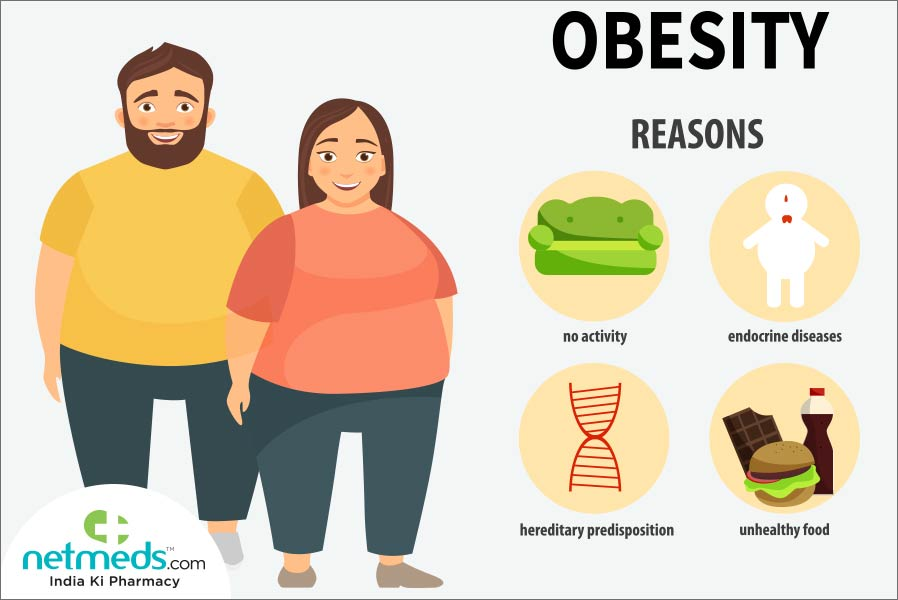

In [2343]:
from IPython.display import Image
Image(filename='obe.jpg')

----------------------------

<center><strong>Présentation du projet</strong></center>
Ce jeu de données Kaggle fournit des informations complètes sur des individus, incluant des caractéristiques clés telles que le sexe, l'âge, la taille, le poids, les antécédents familiaux en matière de surpoids, les habitudes alimentaires, l'activité physique, le mode de transport, ainsi que le niveau d'obésité correspondant. Ce jeu de données est soigneusement élaboré pour la recherche et l'analyse dans le domaine de la santé et des modes de vie.

--------------------------------------
--------------------------------------
--------------------------------------

## **Importation des bibliothèques**

-------------------------

In [2344]:
from pandas import read_csv, concat
from matplotlib.pyplot import show, tight_layout, subplots
from matplotlib.pyplot import figure, title, xlabel, ylabel, grid, tight_layout
from seaborn import kdeplot, heatmap, boxplot, regplot, countplot, histplot

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.metrics import classification_report

from pickle import dump

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

--------------------------------
--------------------------------
-------------------------------

## **Analyse exploratoire des données (EDA)**

### **Initial Data Understanding**

 - **Data loading and Inspection**
 - **Data Types**
 - **Missing Values**
 - **Duplicates**

------------------------

In [2345]:
train_df= read_csv('train_obesity.csv')

In [2346]:
train_df.head()      # Affiche les 5 premières lignes

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [2347]:
train_df.sample(10)  # Affiche 10 lignes aléatoires

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
3227,3227,Female,33.009285,1.600000,66.611273,yes,yes,3.000000,2.218285,Sometimes,no,2.000000,no,1.997529,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
12571,12571,Female,34.576714,1.672959,77.205685,yes,yes,2.000000,2.041558,Sometimes,no,1.708083,no,0.874643,0.000000,no,Public_Transportation,Overweight_Level_II
1859,1859,Female,22.654316,1.621233,82.000000,yes,yes,1.063449,1.000000,Sometimes,no,2.000000,no,0.000000,1.482016,no,Public_Transportation,Obesity_Type_I
10597,10597,Female,26.000000,1.633442,111.004920,yes,yes,3.000000,3.000000,Sometimes,no,2.704315,no,0.000000,0.322666,Sometimes,Public_Transportation,Obesity_Type_III
5026,5026,Female,25.666680,1.608808,109.996742,yes,yes,3.000000,3.000000,Sometimes,no,1.490613,no,0.000000,0.462973,Sometimes,Public_Transportation,Obesity_Type_III
7379,7379,Male,21.000000,1.620000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,1.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
18759,18759,Male,37.532066,1.766888,118.560509,yes,yes,2.000000,3.000000,Sometimes,no,2.104696,no,0.884935,0.000000,Sometimes,Automobile,Obesity_Type_II
5700,5700,Male,19.000000,1.850000,85.000000,yes,yes,2.000000,3.000000,Sometimes,no,3.000000,no,3.000000,1.000000,Sometimes,Public_Transportation,Overweight_Level_II
16851,16851,Female,20.000000,1.550000,49.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,no,Public_Transportation,Normal_Weight
885,885,Male,20.000000,1.700000,70.000000,yes,yes,2.000000,3.000000,Frequently,no,3.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight


In [2348]:
train_df.tail()      # Affiche les 5 dernières lignes

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


In [2349]:
train_df.shape       # (nombre de lignes, nombre de colonnes)

(20758, 18)

In [2350]:
train_df.columns     #  la liste des noms de colonnes

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [2351]:
# Renommage des colonnes
train_df.rename(columns={'FAVC': 'Frequent consumption of high-caloric food', 
                         'family_history_with_overweight':'Family history with overweight',
                         'FCVC': 'Frequency of vegetable consumption',
                         'NCP':'Number of main meals the person eats per day', 
                         'CAEC':'Consumption of food between meals', 
                         'CH2O':'Daily water consumption', 
                         'SCC':'Whether the person takes calorie supplements', 
                         'FAF':'Physical activity frequency', 
                         'TUE':'Time spent using technology', 
                         'CALC':'Alcohol consumption', 
                         'MTRANS':'Means of transportation used',
                         'NObeyesdad':'Obesity level class' } ,inplace=True)

In [2352]:
train_df.columns # Verification du changement.

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'Family history with overweight',
       'Frequent consumption of high-caloric food',
       'Frequency of vegetable consumption',
       'Number of main meals the person eats per day',
       'Consumption of food between meals', 'SMOKE', 'Daily water consumption',
       'Whether the person takes calorie supplements',
       'Physical activity frequency', 'Time spent using technology',
       'Alcohol consumption', 'Means of transportation used',
       'Obesity level class'],
      dtype='object')

In [2353]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20758 non-null  int64  
 1   Gender                                        20758 non-null  object 
 2   Age                                           20758 non-null  float64
 3   Height                                        20758 non-null  float64
 4   Weight                                        20758 non-null  float64
 5   Family history with overweight                20758 non-null  object 
 6   Frequent consumption of high-caloric food     20758 non-null  object 
 7   Frequency of vegetable consumption            20758 non-null  float64
 8   Number of main meals the person eats per day  20758 non-null  float64
 9   Consumption of food between meals             20758 non-null 

In [2354]:
train_df.isnull().sum() 

id                                              0
Gender                                          0
Age                                             0
Height                                          0
Weight                                          0
Family history with overweight                  0
Frequent consumption of high-caloric food       0
Frequency of vegetable consumption              0
Number of main meals the person eats per day    0
Consumption of food between meals               0
SMOKE                                           0
Daily water consumption                         0
Whether the person takes calorie supplements    0
Physical activity frequency                     0
Time spent using technology                     0
Alcohol consumption                             0
Means of transportation used                    0
Obesity level class                             0
dtype: int64

In [2355]:
train_df.duplicated().sum()

0

In [2356]:
train_df = train_df.drop('id',axis=1) # Supprimer la colonne 'id' du DataFrame train_df

----------------------------
----------------------------
----------------------------

### **Analyse statistique de base du jeu de données**

-------------------------

- Summary Statistical : **describe()**

In [2357]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
Frequency of vegetable consumption,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
Number of main meals the person eats per day,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
Daily water consumption,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
Physical activity frequency,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
Time spent using technology,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [2358]:
train_df.select_dtypes(include='object').describe()

,Gender,Family history with overweight,Frequent consumption of high-caloric food,Consumption of food between meals,SMOKE,Whether the person takes calorie supplements,Alcohol consumption,Means of transportation used,Obesity level class
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


----------------------------

- Summary Statistical : **value_counts()**

In [2359]:
train_df['Gender'].value_counts()

Female    10422
Male      10336
Name: Gender, dtype: int64

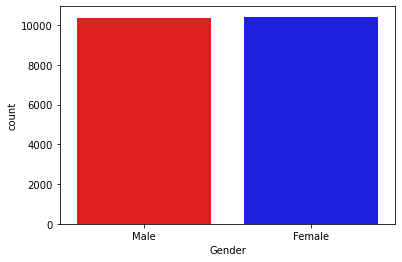

In [2360]:
countplot(x='Gender', data=train_df, palette=['red','blue'])
xlabel('Gender')
show()

--------------------------

In [2361]:
train_df['Family history with overweight'].value_counts()

yes    17014
no      3744
Name: Family history with overweight, dtype: int64

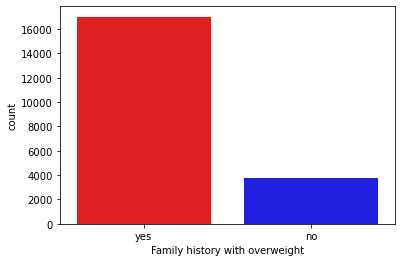

In [2362]:
countplot(x='Family history with overweight', data=train_df, palette=['red','blue'])
xlabel('Family history with overweight')
show()

---------------------

In [2363]:
train_df['Frequent consumption of high-caloric food'].value_counts()

yes    18982
no      1776
Name: Frequent consumption of high-caloric food, dtype: int64

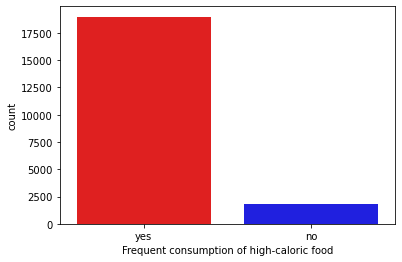

In [2364]:
countplot(x='Frequent consumption of high-caloric food', data=train_df, palette=['red','blue'])
xlabel('Frequent consumption of high-caloric food')
show()

-----------------------

In [2365]:
train_df['Consumption of food between meals'].value_counts()

Sometimes     17529
Frequently     2472
Always          478
no              279
Name: Consumption of food between meals, dtype: int64

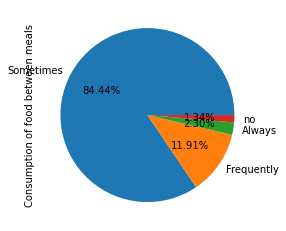

In [2366]:
train_df['Consumption of food between meals'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **Le pourcentage de consommation de nourriture entre les repas (sometimes) est très élevé (84,44 %) par rapport aux autres pourcentages** 

--------------------------

In [2367]:
train_df['SMOKE'].value_counts()

no     20513
yes      245
Name: SMOKE, dtype: int64

---------------------

In [2368]:
train_df['Whether the person takes calorie supplements'].value_counts()

no     20071
yes      687
Name: Whether the person takes calorie supplements, dtype: int64

---------------------------

In [2369]:
train_df['Alcohol consumption'].value_counts()

Sometimes     15066
no             5163
Frequently      529
Name: Alcohol consumption, dtype: int64

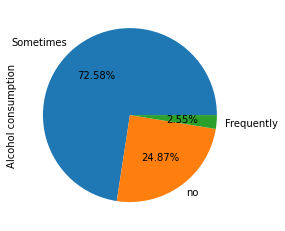

In [2370]:
train_df['Alcohol consumption'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **Le pourcentage de consommation d’alcool (sometimes) est très élevé (72,58 %) par rapport aux pourcentages des autres catégories** 

-----------------------------

In [2371]:
train_df['Means of transportation used'].value_counts()

Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: Means of transportation used, dtype: int64

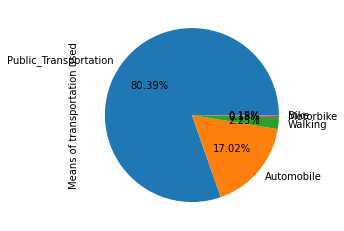

In [2372]:
train_df['Means of transportation used'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **Le pourcentage d'utilisation des transports en commun est très élevé (80,39 %) par rapport aux pourcentages des autres modes de transport** 

-------------------------

In [2373]:
train_df['Obesity level class'].value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: Obesity level class, dtype: int64

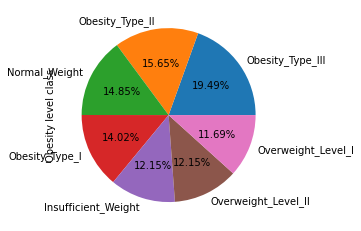

In [2374]:
train_df['Obesity level class'].value_counts().plot.pie(autopct='%0.2f%%')
show()

--------------------------------
------------------------------

## **Distribution des Variables**

------------------------

- **Numerical Features (KDE)**

----------------------

In [2375]:
train_df.select_dtypes('number')

,Age,Height,Weight,Frequency of vegetable consumption,Number of main meals the person eats per day,Daily water consumption,Physical activity frequency,Time spent using technology
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721
...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439
20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834


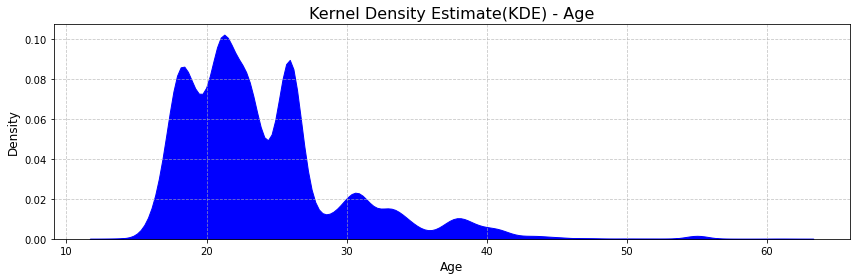

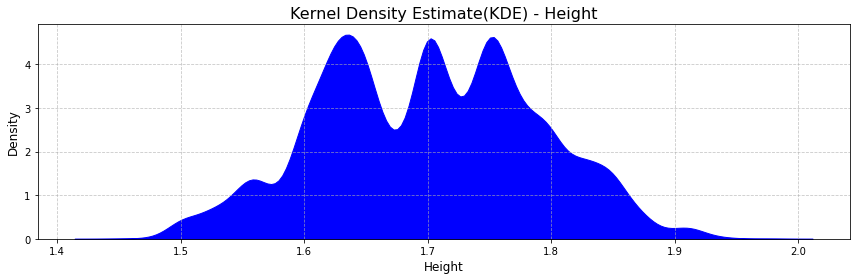

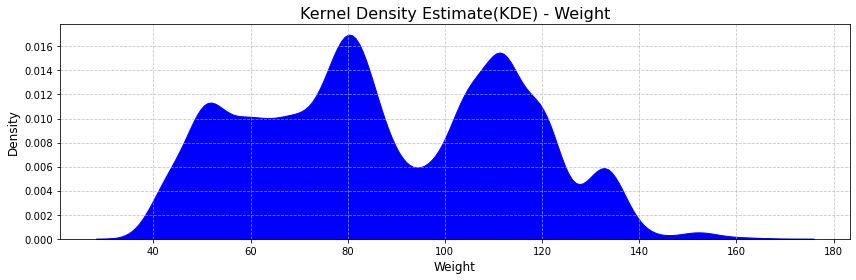

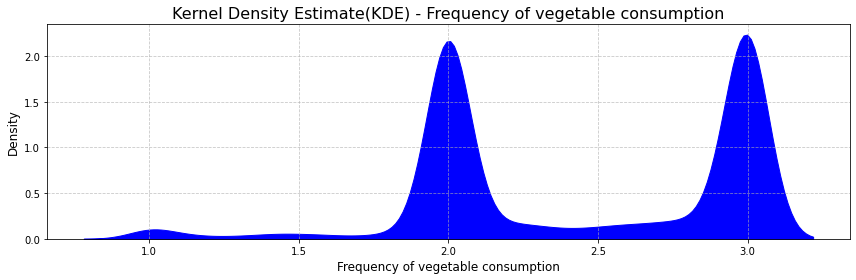

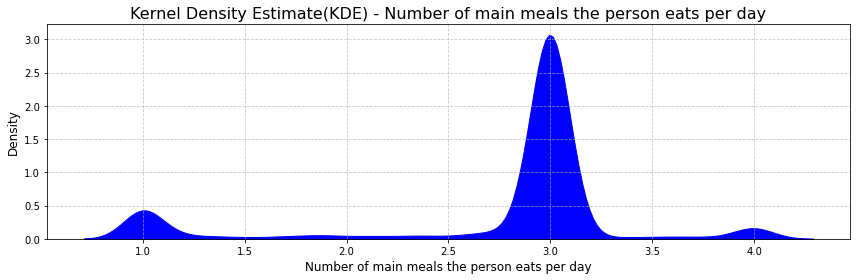

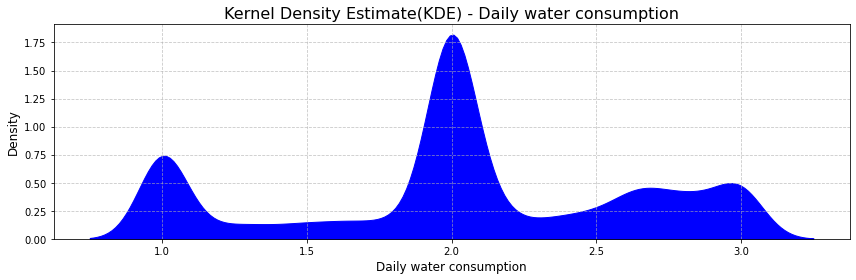

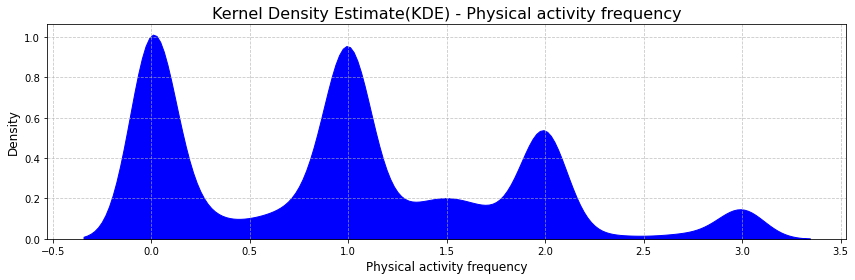

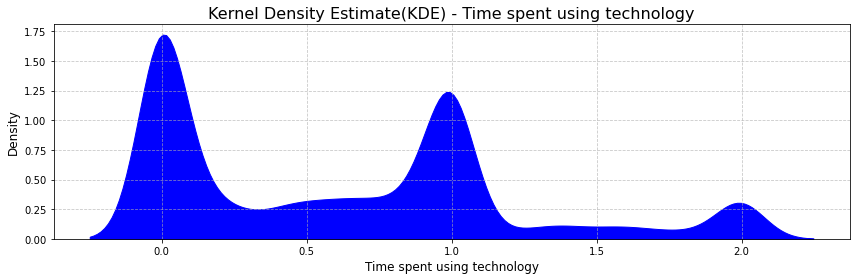

In [2376]:
## **Un KDE est une méthode non paramétrique utilisée pour estimer la densité de probabilité d’une variable aléatoire continue**
for	col	in train_df.select_dtypes('number').columns:
    figure(figsize=(12,	4))
    kdeplot(train_df[col], fill=True,	color='blue', alpha=1)
    title(f'Kernel Density Estimate(KDE) - {col}',	fontsize=16)
    xlabel(col,	fontsize=12)
    ylabel('Density', fontsize=12)
    grid(True, linestyle='--', alpha=0.7)
    tight_layout()
    show()

-----------------

#### **The Distribution of Age**

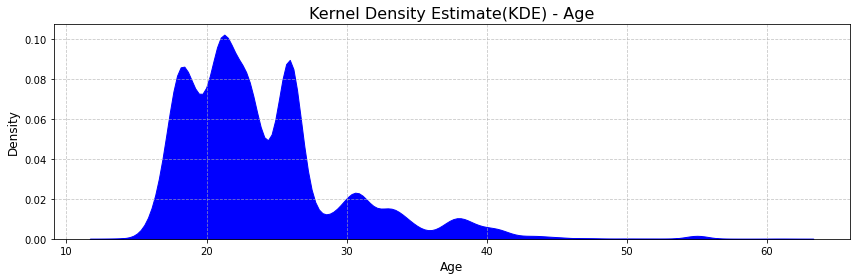

In [2377]:
figure(figsize=(12,	4))
kdeplot(train_df['Age'], fill=True,	color='blue', alpha=1)
title(f'Kernel Density Estimate(KDE) - Age',	fontsize=16)
xlabel('Age',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

#### **Distribution multimodale : Il semble exister plusieurs pics distincts dans la distribution, ce qui indique la présence de plusieurs groupes d'âge plus représentés dans les données.**
#### **Pic principal : Le pic le plus élevé se situe autour de l’âge de 20 à 25 ans, ce qui suggère que ce groupe d’âge est le plus représenté dans le jeu de données.**
#### **Pics secondaires : D'autres pics moins prononcés apparaissent vers l’âge de 30 ans et en dessous de 10 ans, indiquant la présence d'autres sous-groupes ayant également une densité notable.**
#### **Dispersion des données : La distribution s’étend sur une plage assez large, allant d’environ 5 à 60 ans, ce qui montre une grande variabilité des âges dans l’ensemble des données.**
#### **Déclin de la queue (tail) : La partie droite de la distribution diminue progressivement, ce qui suggère qu’il y a moins d’individus dans les groupes d’âge plus avancés.**

------------------------

#### **Distribution of Height**

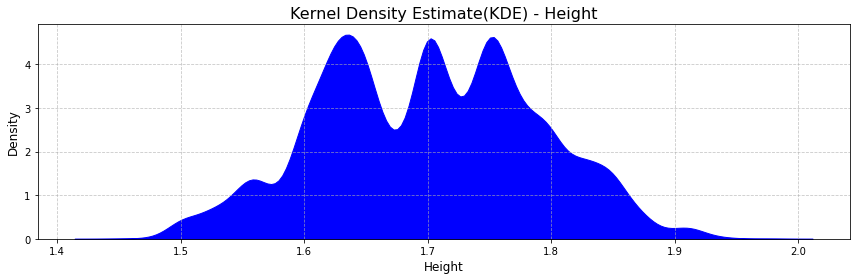

In [2378]:
figure(figsize=(12,	4))
kdeplot(train_df['Height'], fill=True,	color='blue', alpha=1)
title(f'Kernel Density Estimate(KDE) - Height',	fontsize=16)
xlabel('Height',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

#### **Distribution multimodale :** Le graphe montre également plusieurs pics, ce qui suggère la présence de plusieurs groupes ayant des tailles différentes représentées plus fréquemment dans le jeu de données.
#### **Plages de taille dominantes :** Les pics les plus marqués se situent autour de 1,65 mètres et 1,75 mètres. Cela indique que les individus ayant ces tailles sont les plus nombreux dans les données.
#### **Pic secondaire :** Un pic plus petit mais visible apparaît vers 1,55 mètre, ce qui suggère l’existence d’un autre groupe, moins représenté, avec cette taille.
#### **Étendue des tailles :** La distribution des tailles s’étend approximativement de 1,4 mètre à 2,0 mètres, ce qui montre la plage de tailles présente dans le jeu de données.
#### **Faible densité aux extrémités :** La densité est nettement plus faible aux extrémités de la distribution (individus très petits ou très grands) par rapport aux pics centraux.

-------------------------

#### **The Distribution of Weight**

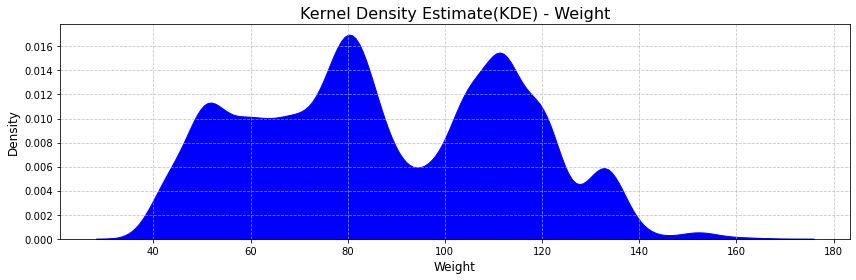

In [2379]:
figure(figsize=(12,	4))
kdeplot(train_df['Weight'], fill=True,	color='blue', alpha=1)
title(f'Kernel Density Estimate(KDE) - Weight',	fontsize=16)
xlabel('Weight',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

- #### **Distribution bimodale** : Ce graphique montre clairement deux pics distincts, ce qui indique deux plages de poids particulièrement fréquentes dans l’ensemble de données. Cela suggère la présence de deux groupes majeurs d’individus ayant des poids typiques différents.  
- #### **Groupe de poids principal** : Le pic le plus élevé se situe autour de 80 kilogrammes. Cela suggère qu’une partie significative de votre ensemble de données est composée d’individus pesant environ ce poids.  
- #### **Groupe de poids secondaire** : Le second pic, légèrement plus bas, se situe autour de 115 kilogrammes. Cela indique un autre groupe important d’individus ayant un poids moyen plus élevé que le premier groupe.  
- #### **Plage de poids** : La distribution des poids s’étend d’environ 30 kilogrammes à 180 kilogrammes, ce qui montre l’étendue générale des poids présents dans les données.  
- #### **Densité plus faible entre les pics et aux extrémités** : La densité est nettement plus faible entre les deux pics principaux (environ entre 90 et 100 kg), ainsi qu’aux extrémités très basses et très hautes de la plage de poids. Cela implique qu’il y a moins d’individus dans ces plages de poids dans l’ensemble de données.  
- #### **Pics secondaires** : On observe également de petites bosses ou pics mineurs, par exemple autour de 55 kg et 140 kg, qui pourraient représenter des sous-groupes plus petits dans les données.


-------------------

#### **The Distribution of daily water consumption**

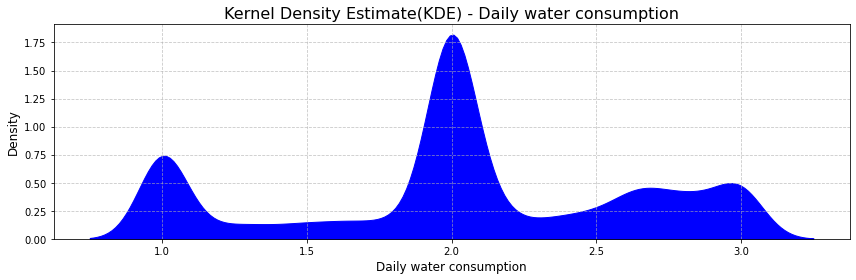

In [2380]:
figure(figsize=(12,	4))
kdeplot(train_df['Daily water consumption'], fill=True,	color='blue', alpha=1)
title(f'Kernel Density Estimate(KDE) - Daily water consumption',	fontsize=16)
xlabel('Daily water consumption',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

- ##### **Distribution trimodale** : On peut clairement observer trois pics distincts, ce qui suggère trois niveaux courants de consommation d’eau quotidienne dans l’ensemble de données. Cela indique la présence d’au moins trois groupes d’individus ayant des habitudes de consommation d’eau différentes.  
- ##### **Niveau de consommation principal** : Le pic le plus prononcé se situe autour de 2 litres de consommation d’eau par jour. Cela indique qu’une part importante des individus dans l’ensemble de données consomme environ cette quantité d’eau quotidiennement.  
- ##### **Niveaux de consommation secondaires** : Deux autres pics notables sont présents. L’un, plus petit que le pic principal, se trouve autour de 1 litre, suggérant un groupe avec une consommation quotidienne plus faible. Le troisième pic, également important, apparaît autour de 3 litres, indiquant un groupe avec une consommation d’eau plus élevée.  
- ##### **Plage de consommation** : La distribution s’étend d’environ 0,5 litre à 3,5 litres de consommation d’eau par jour, ce qui montre l’étendue générale observée dans les données.  
- ##### **Densité plus faible entre les pics** : La densité est plus faible dans les zones situées entre ces pics, ce qui suggère qu’il y a moins d’individus ayant une consommation quotidienne d’eau comprise entre 1 et 2 litres, et entre 2 et 3 litres.


-----------------

#### **The Distribution of physical activity frequency**

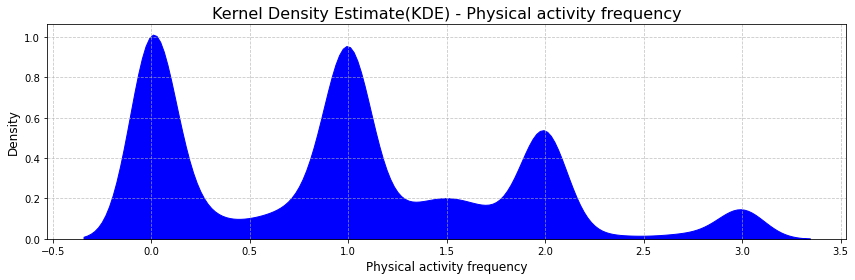

In [2381]:
figure(figsize=(12,	4))
kdeplot(train_df['Physical activity frequency'], fill=True,	color='blue', alpha=1)
title(f'Kernel Density Estimate(KDE) - Physical activity frequency',	fontsize=16)
xlabel('Physical activity frequency',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

- ##### **Distribution multimodale** : On peut observer quatre pics distincts, ce qui indique quatre fréquences courantes d’activité physique dans votre ensemble de données. Cela suggère la présence de plusieurs groupes d’individus ayant des niveaux d’engagement différents dans l’activité physique.  
- ##### **Pics principaux** : Les deux pics les plus prononcés apparaissent autour d’une fréquence de 0 (représentant probablement les individus ne pratiquant aucune activité physique) et d’une fréquence de 1 (représentant peut-être ceux qui sont actifs une fois par période définie, comme par semaine). Ce sont les niveaux d’activité physique les plus fréquents dans vos données.  
- ##### **Pics secondaires** : Deux autres pics plus petits mais visibles sont présents. L’un se situe autour d’une fréquence de 2, suggérant un groupe s’engageant dans l’activité physique à cette fréquence. Le plus petit pic apparaît autour d’une fréquence de 3, indiquant un groupe plus restreint avec une fréquence d’activité physique plus élevée.  
- ##### **Plage des fréquences** : La distribution s’étend d’environ -0,2 à 3,2 sur l’échelle de fréquence de l’activité physique. Étant donné que la fréquence ne peut pas être négative, la partie en dessous de zéro est probablement due au lissage effectué par l’estimation de densité (kernel density estimation). La plage pratique va donc de 0 à environ 3.  
- ##### **Densité plus faible entre les pics** : La densité est plus faible entre les pics principaux, ce qui suggère qu’il y a moins d’individus avec des fréquences d’activité physique comprises entre 0 et 1, entre 1 et 2, etc.


------------------------

### **Correlation**

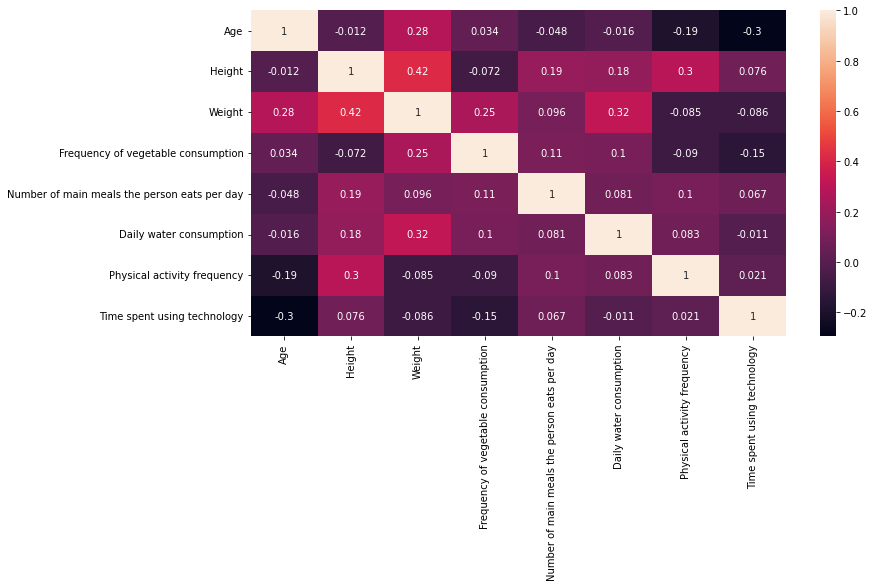

In [2382]:
figure(figsize=(12,	6))
heatmap(train_df.select_dtypes(include='number').corr(), annot=True)
show()

- ##### **Poids et taille (0,42)** : Il existe une corrélation positive modérée, ce qui signifie que, de manière générale, les personnes plus grandes ont tendance à peser davantage.  
- ##### **Poids et âge (0,28)** : Il existe une faible corrélation positive, suggérant une légère tendance à la prise de poids avec l’âge dans l’ensemble de données.  
- ##### **Poids et consommation quotidienne d’eau (0,32)** : Il existe une faible corrélation positive, suggérant une légère tendance des individus consommant plus d’eau à également peser un peu plus dans l’ensemble de données.  
- ##### **Taille et fréquence d’activité physique (0,3)** : Il existe une faible corrélation positive, suggérant une légère tendance des individus plus grands à pratiquer une activité physique plus fréquemment.  
- ##### **Âge et temps passé sur la technologie (-0,3)** : Il existe une faible corrélation négative, suggérant une légère tendance des individus plus âgés à passer moins de temps à utiliser des technologies.  
- ##### **Fréquence d’activité physique et temps passé sur la technologie (0,021)** : La corrélation est très faible, presque nulle, ce qui indique pratiquement aucune relation linéaire entre la fréquence de pratique d’une activité physique et le temps passé à utiliser des technologies dans l’ensemble de données.
- #### **Il existe une corrélation négative élevée (-0,3) entre l’âge et le temps passé à utiliser la technologie .**


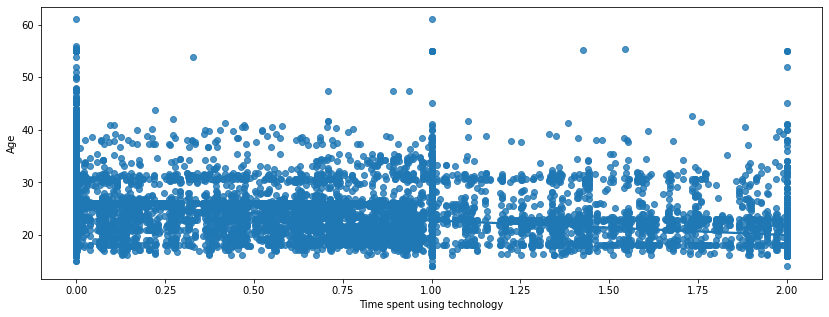

In [2383]:
fig,ax = subplots()
fig.set_size_inches(14, 5)
regplot(x="Time spent using technology", y="Age", data=train_df,ax=ax)
show()

------------------------------
-----------------------------

## **Feature Extraction**

-------------------------

In [2384]:
train_df['Frequency of vegetable consumption'].value_counts()

3.000000    7658
2.000000    7653
1.000000     275
2.967300     121
2.766612      54
            ... 
2.443674       1
1.111887       1
1.595746       1
2.577427       1
2.731368       1
Name: Frequency of vegetable consumption, Length: 934, dtype: int64

##### Transform values in column **Frequency of vegetable consumption** with **round()** function

In [2385]:
train_df['Frequency of vegetable consumption'] = train_df['Frequency of vegetable consumption'].apply(lambda x : round(x))

In [2386]:
train_df['Frequency of vegetable consumption'].value_counts()

3    10092
2     9911
1      755
Name: Frequency of vegetable consumption, dtype: int64

#### Extracting new column **[Frequency of vegetable consumption Classes]** from **[Frequency of vegetable consumption]**

In [2387]:
def fcvc(n):
    n = int(n)
    if n == 1:
        return 'Rarely consumes vegetables'
    if n == 2:
        return 'Sometimes consumes vegetables'
    if n == 3:
        return 'Regularly consumes vegetables'

train_df['Frequency of vegetable consumption Classes'] = train_df['Frequency of vegetable consumption'].apply(lambda x : fcvc(x))

In [2388]:
train_df['Frequency of vegetable consumption Classes'].value_counts()

Regularly consumes vegetables    10092
Sometimes consumes vegetables     9911
Rarely consumes vegetables         755
Name: Frequency of vegetable consumption Classes, dtype: int64

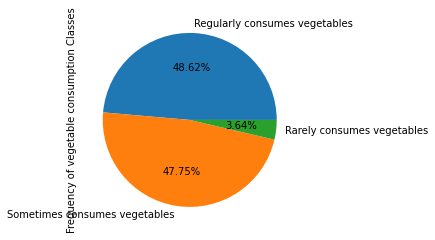

In [2389]:
train_df['Frequency of vegetable consumption Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **Le pourcentage de personnes consommant rarement des légumes est très faible (3,64 %) comparé aux autres pourcentages.**

-------------------------------

In [2390]:
train_df['Number of main meals the person eats per day'].value_counts()

3.000000    14706
1.000000     1976
4.000000      715
2.993623       39
2.695396       25
            ...  
3.608850        1
1.193486        1
2.737620        1
3.019574        1
2.256119        1
Name: Number of main meals the person eats per day, Length: 689, dtype: int64

##### Transform values in column **Number of main meals the person eats per day** with **round()** function

In [2391]:
train_df['Number of main meals the person eats per day'] = train_df['Number of main meals the person eats per day'].apply(lambda x : round(x))
train_df['Number of main meals the person eats per day'] = train_df['Number of main meals the person eats per day'].astype(int)
train_df['Number of main meals the person eats per day'].value_counts()

3    16309
1     2510
4     1040
2      899
Name: Number of main meals the person eats per day, dtype: int64

#### Extracting new column **[Number of main meals the person eats per day Classes]** from **[Number of main meals the person eats per day]**

In [2392]:
def fncp(m):
    m = int(m)
    if m == 1:
        return 'One meal per day'
    if m == 2:
        return 'Two meals per day'
    if m == 3:
        return 'Three meals per day'
    if m == 4:
        return 'More than three meals'

train_df['Number of main meals the person eats per day Classes'] = train_df['Number of main meals the person eats per day'].apply(lambda x : fncp(x))

In [2393]:
train_df['Number of main meals the person eats per day Classes'].value_counts()

Three meals per day      16309
One meal per day          2510
More than three meals     1040
Two meals per day          899
Name: Number of main meals the person eats per day Classes, dtype: int64

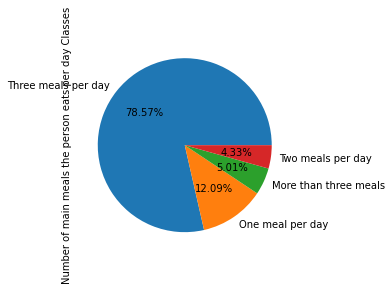

In [2394]:
train_df['Number of main meals the person eats per day Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **Le pourcentage de personnes prenant trois repas par jour est très élevé (78,57 %) comparé aux autres pourcentages.**


------------------------

#### Extracting new column **[Daily water consumption Classes]** from **[Daily water consumption]**

In [2395]:
train_df['Daily water consumption'].value_counts()

2.000000    6616
1.000000    2799
3.000000    1571
2.825629      77
2.868167      60
            ... 
2.835195       1
2.632983       1
2.090213       1
2.756916       1
1.365188       1
Name: Daily water consumption, Length: 1506, dtype: int64

In [2396]:
def fncp(m):
    m = int(m)
    if m <= 1:
        return 'Low water intake'
    elif m <= 2:
        return 'Moderate water intake'
    if m > 2:
        return 'High water intake'

train_df['Daily water consumption Classes'] = train_df['Daily water consumption'].apply(lambda x : fncp(x))

In [2397]:
train_df['Daily water consumption Classes'].value_counts()

Moderate water intake    13051
Low water intake          6136
High water intake         1571
Name: Daily water consumption Classes, dtype: int64

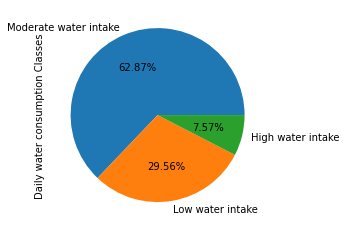

In [2398]:
train_df['Daily water consumption Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **Le pourcentage de personnes ayant une consommation modérée d’eau est très élevé (62,87 %) comparé aux autres pourcentages.**


------------------------

#### Extracting new column **[Physical activity frequency Classes]** from **[Physical activity frequency]**

In [2399]:
train_df['Physical activity frequency'].value_counts()

0.000000    5044
1.000000    4097
2.000000    2391
3.000000     800
1.097905      56
            ... 
1.706287       1
0.675983       1
1.923607       1
1.320209       1
0.988668       1
Name: Physical activity frequency, Length: 1360, dtype: int64

In [2400]:
def fncp(m):
    m = int(m)
    if m == 0 :
        return 'No physical activity'
    elif m <= 1 :
        return 'Very low activity'
    elif m < 2.6 :
        return 'Low to moderate activity'
    else :
        return 'Moderate activity'

train_df['Physical activity frequency Classes'] = train_df['Physical activity frequency'].apply(lambda x : fncp(x))

In [2401]:
train_df['Physical activity frequency Classes'].value_counts()

No physical activity        9191
Very low activity           7886
Low to moderate activity    2881
Moderate activity            800
Name: Physical activity frequency Classes, dtype: int64

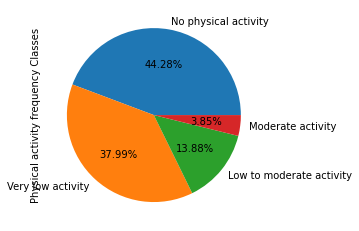

In [2402]:
train_df['Physical activity frequency Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **Le pourcentage de personnes ayant une activité modérée  est très bas (3,85 %) comparé aux autres pourcentages.**


----------------------

#### Extracting new column **[Time spent using technology Classes]** from **[Time spent using technology]**

In [2403]:
train_df['Time spent using technology'].value_counts()

0.000000    6566
1.000000    4326
2.000000    1133
0.002600      78
0.723154      65
            ... 
1.223661       1
0.057868       1
0.236067       1
0.073088       1
0.768375       1
Name: Time spent using technology, Length: 1297, dtype: int64

In [2404]:
def fncp(m):
    m = int(m)
    if m <= 1 :
        return 'Very low screen time'
    else :
        return 'Moderate screen time'

train_df['Time spent using technology Classes'] = train_df['Time spent using technology'].apply(lambda x : fncp(x))

In [2405]:
train_df['Time spent using technology Classes'].value_counts()

Very low screen time    19625
Moderate screen time     1133
Name: Time spent using technology Classes, dtype: int64

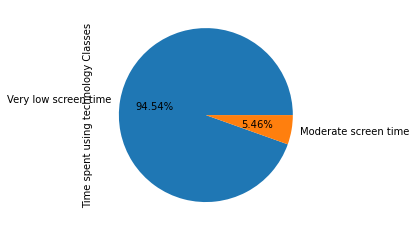

In [2406]:
train_df['Time spent using technology Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

##### **Le pourcentage de personnes ayant un temps d’écran très faible est très élevé (94,54 %) comparé aux autres pourcentages.**


------------------------

##### Transform values in column **Age** with **round()** function

In [2407]:
train_df['Age']

0        24.443011
1        18.000000
2        18.000000
3        20.952737
4        31.641081
           ...    
20753    25.137087
20754    18.000000
20755    20.101026
20756    33.852953
20757    26.680376
Name: Age, Length: 20758, dtype: float64

In [2408]:
train_df['Age'] = train_df['Age'].apply(lambda x : int(round(x)))
train_df['Age'] 

0        24
1        18
2        18
3        21
4        32
         ..
20753    25
20754    18
20755    20
20756    34
20757    27
Name: Age, Length: 20758, dtype: int64

In [2409]:
train_df.to_csv('Obesity risk (New data).csv',index=False)

-----------------------
-----------------------

## **Detect Outliers**

------------------------

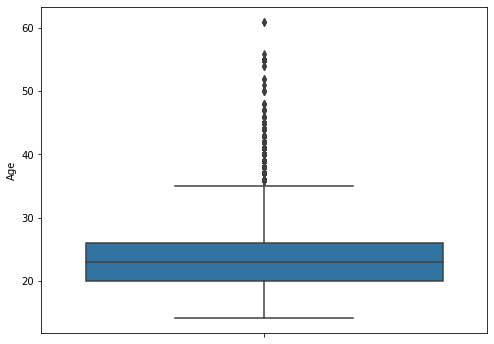

In [2410]:
fig, axes = subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 6)
boxplot(data = train_df, y = 'Age', orient="v", ax=axes)
show()

- ##### La majorité des individus dans l’ensemble de données ont entre environ 20 et 26 ans.  
- ##### L’âge médian est d’environ 23 ans.  
- ##### Il y a quelques individus plus jeunes (jusqu’à environ 14 ans) ainsi qu’un certain nombre d’individus nettement plus âgés (valeurs aberrantes) dans l’ensemble de données.  
- ##### La distribution des âges est légèrement asymétrique vers les valeurs les plus basses, car la médiane est plus proche du premier quartile que du troisième.


In [2411]:
# Calcul des bornes
Q1 = train_df['Age'].quantile(0.25)
Q3 = train_df['Age'].quantile(0.75)
IQR = Q3 - Q1

Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR

# Compter les outliers
outliers = ((train_df['Age'] > Upper_bound) | (train_df['Age'] < Lower_bound)).sum()
print(f"Nombre d'outliers dans 'Age' : {outliers} -- {round(100 * outliers / len(train_df), 2)}%")

# Suppression des outliers si présents
if outliers > 0:
    train_df = train_df.loc[(train_df['Age'] <= Upper_bound) & (train_df['Age'] >= Lower_bound)]

Nombre d'outliers dans 'Age' : 1029 -- 4.96%


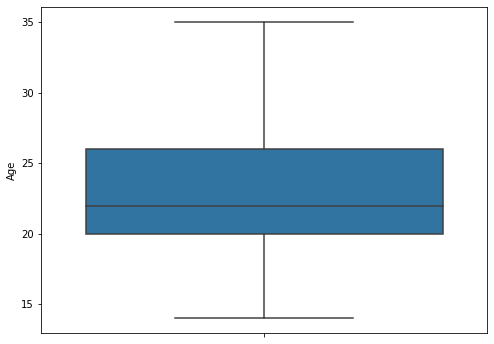

In [2412]:
fig, axes = subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 6)
boxplot(data = train_df, y = 'Age', orient="v", ax=axes)
show()

- ##### Après suppression des valeurs aberrantes(outliers), ce boxplot montre désormais que la distribution des âges est plus concentrée, avec :  
- ##### 50 % des individus situés entre 20 et 26 ans.  
- ##### L’âge médian restant autour de 23 ans.  
- ##### L’étendue totale des âges allant désormais d’environ 14 à 35 ans.


In [2536]:
train_df.to_csv('train data (New data).csv',index=False)

------------------------
------------------------

## **Analysis**

---------------------------

##### **Investigate relationships between Gender and Physical activity frequency Classes**

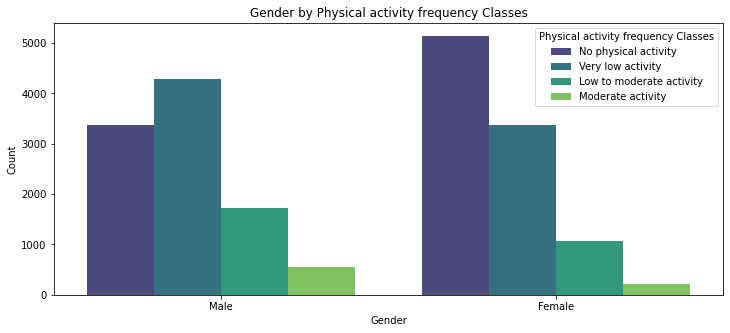

In [2541]:
figure(figsize=(12,	5))
countplot(data=train_df, x='Gender', hue='Physical activity frequency Classes',	palette='viridis')
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
ylabel('Count')
show()

- ##### L’absence d’activité physique est la catégorie la plus répandue pour les deux sexes. Cependant, le nombre de femmes déclarant ne pratiquer aucune activité physique est nettement supérieur à celui des hommes dans cette même catégorie.  
- ##### Une activité très faible est la deuxième catégorie la plus fréquente pour les deux sexes. Fait intéressant, davantage d’hommes appartiennent à cette catégorie que de femmes.  
- ##### À mesure que la fréquence de l’activité physique augmente, le nombre d’individus dans chaque catégorie diminue, tant chez les hommes que chez les femmes.  
- ##### Il semble exister une disparité entre les sexes en matière de niveau d’activité physique. Une proportion plus élevée de femmes dans cet ensemble de données déclare ne pas pratiquer d’activité physique, tandis qu’une proportion plus élevée d’hommes déclare avoir une activité physique très faible à modérée.  

### **Résumé** :

- ##### Le manque d’activité physique est une caractéristique importante pour les hommes comme pour les femmes, mais davantage chez les femmes.  
- ##### Les hommes ont tendance à avoir un engagement légèrement plus élevé dans une activité physique très faible à modérée comparé aux femmes.  
- ##### L’activité physique modérée est la moins courante pour les deux sexes.  
##### Ces informations peuvent être cruciales pour comprendre les habitudes de vie au sein de la population étudiée et leur lien éventuel avec le risque d’obésité.


------------------------

##### **Investigate relationships between Gender and Obesity level class**

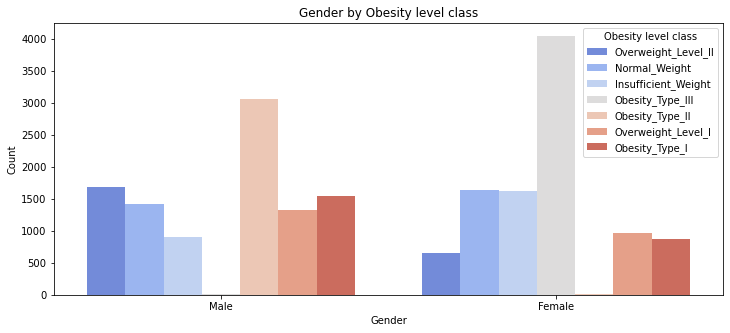

In [2415]:
figure(figsize=(12, 5))
countplot(data=train_df, x='Gender', hue='Obesity level class', palette='coolwarm')
title('Gender by Obesity level class')
xlabel('Gender')
ylabel('Count')
show()

- ##### **Normal Weight** et **Overweight_Level_II** sont relativement courants chez les deux sexes. 
- ##### **Insufficient Weight** est plus fréquente chez les femmes que chez les hommes dans cet ensemble de données.  
- ##### **Obesity_Type_III**  est significativement plus courante chez les femmes que chez les hommes.  
- ##### **Obesity_Type_II**, **Overweight_Level_I**, et **Obesity_Type_I** sont plus fréquents chez les hommes que chez les femmes.


-------------------------

##### **Analyze weight distribution by Gender**

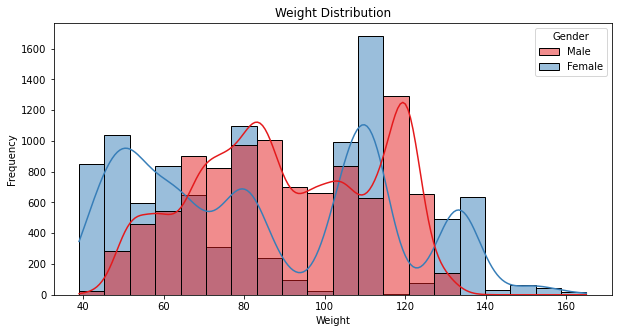

In [2416]:
figure(figsize=(10, 5))
histplot(data=train_df,	x='Weight',	hue='Gender', kde=True, bins=20, palette='Set1')
title('Weight Distribution')
xlabel('Weight')
ylabel('Frequency')
show()

### **Comparaison entre les sexes** :

- ##### **Différences de tendances centrales** : Les hommes ont tendance à avoir un poids globalement plus élevé, avec un pic principal autour de 80-85 kg, tandis que le pic principal chez les femmes est plus bas, autour de 55-60 kg.  
- ##### **Fréquence plus élevée de poids faibles chez les femmes** : On observe un pic net dans la distribution du poids des femmes autour de 40-45 kg, qui n’est pas aussi marqué chez les hommes.  
- ##### **Pics secondaires à des poids différents** : Les pics secondaires apparaissent chez les hommes autour de 115-120 kg et chez les femmes autour de 100-105 kg.  
- ##### **Étalement similaire** : Les deux sexes présentent une étendue globale de poids similaire.

### **En résumé**, ce graphique montre que :

- ##### La distribution des poids diffère significativement entre les hommes et les femmes dans cet ensemble de données.  
- ##### Les hommes ont tendance à présenter une distribution bimodale avec des pics à des plages de poids plus élevées.  
- ##### Les femmes présentent une distribution plus complexe, potentiellement trimodale, avec un pic principal à une plage de poids plus faible et d'autres pics significatifs à des poids plus élevés.


---------------------

##### **Analyze Height distribution by Gender**

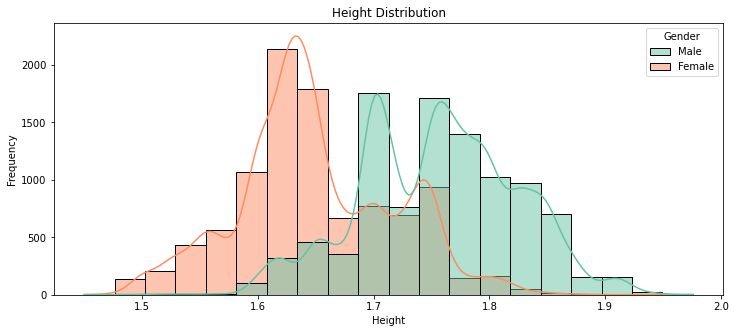

In [2417]:
figure(figsize=(12, 5))
histplot(data=train_df,	x='Height',	hue='Gender', kde=True, bins=20, palette='Set2')
title('Height Distribution')
xlabel('Height')
ylabel('Frequency')
show()

### **Comparaison entre les sexes** :

- ##### **Différences de tendances centrales** : Les hommes sont généralement plus grands que les femmes dans cet ensemble de données. Les pics principaux chez les hommes se situent à des valeurs de taille plus élevées que ceux des femmes.
- ##### **Plages qui se chevauchent** : Bien que les tendances centrales diffèrent, il existe un chevauchement des plages de taille entre les hommes et les femmes, notamment entre 1,60 mètre et 1,75 mètre.
- ##### **Étalement moins large chez les femmes** : La distribution des tailles chez les femmes semble légèrement plus resserrée que celle des hommes.

### **En résumé**, ce graphique montre que :

- ##### Il existe des différences claires dans la distribution des tailles entre les hommes et les femmes dans cet ensemble de données.
- ##### Les hommes sont principalement concentrés autour de deux plages de taille : 1,70-1,75 mètres et 1,75-1,80 mètres, cette dernière étant la plus fréquente.
- ##### Les femmes présentent également une distribution bimodale, concentrée autour de 1,60-1,65 mètres et 1,65-1,70 mètres, la première étant la plus fréquente.


-----------------------

- ##### **Gender** with **Age > 30** and **Weight >= 90**

In [2418]:
GenderGt30AndWeightGte90 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) , (['Age','Gender','Weight'])]

In [2419]:
GenderGt30AndWeightGte90

,Age,Gender,Weight
4,32,Male,93.798055
46,31,Male,120.998266
102,31,Male,122.813033
103,32,Male,90.000000
203,35,Female,90.000000
...,...,...,...
20583,34,Male,91.059595
20598,31,Male,112.277567
20635,31,Male,120.919703
20710,34,Male,102.134646


In [2420]:
GenderGt30AndWeightGte90['Age'].value_counts()

31    550
32    160
33    154
34     68
35     29
Name: Age, dtype: int64

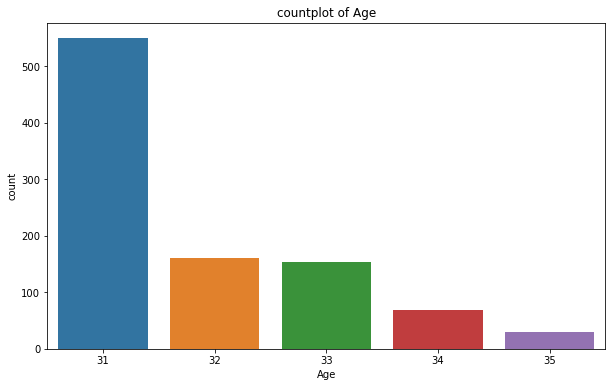

In [2421]:
figure(figsize=(10, 6))
countplot(data = GenderGt30AndWeightGte90, x = 'Age', order = GenderGt30AndWeightGte90['Age'].value_counts().index)
title('countplot of Age')
show()

In [2422]:
GenderGt30AndWeightGte90['Gender'].value_counts()

Male      955
Female      6
Name: Gender, dtype: int64

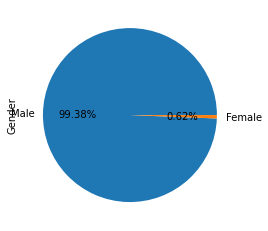

In [2423]:
GenderGt30AndWeightGte90['Gender'].value_counts().plot.pie(autopct='%0.2f%%')
show()

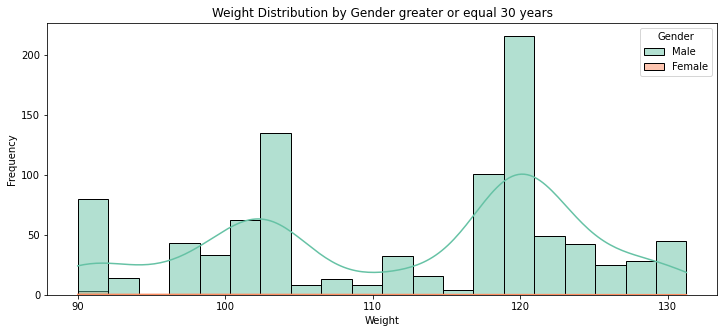

In [2424]:
figure(figsize=(12, 5))
histplot(data=GenderGt30AndWeightGte90,	x='Weight',	hue='Gender', kde=True, bins=20, palette='Set2')
title('Weight Distribution by Gender greater or equal 30 years')
xlabel('Weight')
ylabel('Frequency')
show()

### **Comparaison entre les sexes dans cette plage de poids** :

- ##### **Prévalence plus élevée chez les hommes** : Les hommes sont significativement plus représentés dans la plage de poids allant de 90 kg à 130 kg par rapport aux femmes dans cet ensemble de données.
- ##### **Formes de distribution différentes** : Alors que les hommes présentent une distribution bimodale dans cette plage, le nombre de femmes est trop faible pour discerner un schéma clair de distribution.

### **Cette vue rapprochée de la plage de poids élevée suggère que** :

- ##### Les poids entre 90 kg et 130 kg sont considérablement plus fréquents chez les hommes dans cet ensemble de données.
- ##### Dans ce segment de poids élevé chez les hommes, il existe probablement deux sous-groupes ayant des poids moyens autour de 103 kg et 121 kg.
- ##### Les femmes sont relativement rares dans cette plage de poids élevée de l'ensemble de données.


----------------------

- ##### **Gender** with **Age <= 30** and **Weight >= 90**

In [2425]:
GenderLte30AndWeightGte90 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) , (['Age','Gender','Weight'])]

In [2426]:
GenderLte30AndWeightGte90['Age'].value_counts()

26    2860
23     849
21     833
22     630
25     517
24     505
18     454
27     303
30     291
19     215
20     202
28     144
29     116
17      66
16       1
Name: Age, dtype: int64

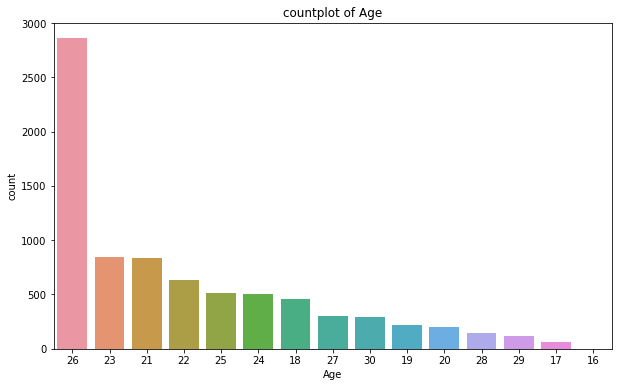

In [2427]:
figure(figsize=(10, 6))
countplot(data = GenderLte30AndWeightGte90, x = 'Age', order = GenderLte30AndWeightGte90['Age'].value_counts().index)
title('countplot of Age')
show()

In [2428]:
GenderLte30AndWeightGte90['Gender'].value_counts()

Female    4151
Male      3835
Name: Gender, dtype: int64

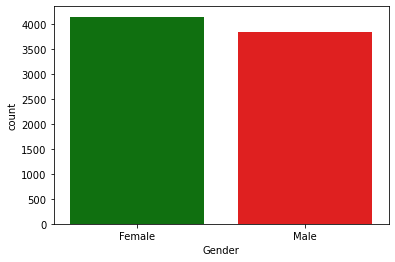

In [2429]:
countplot(x='Gender', data=GenderLte30AndWeightGte90, palette=['green','red'])
xlabel('Gender')
show()

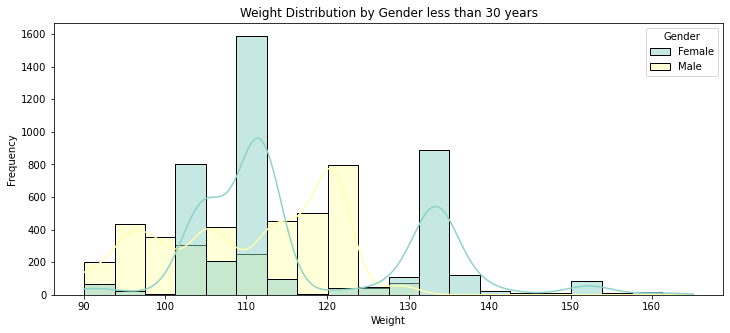

In [2430]:
figure(figsize=(12, 5))
histplot(data=GenderLte30AndWeightGte90,	x='Weight',	hue='Gender', kde=True, bins=20, palette='Set3')
title('Weight Distribution by Gender less than 30 years')
xlabel('Weight')
ylabel('Frequency')
show()

### **Comparaison entre les sexes dans cette plage de poids** :

- ##### **Pics principaux différents** : Les femmes dans ce segment de poids élevé ont tendance à se regrouper autour de 110-112 kg, tandis que les hommes se regroupent davantage autour de 120-122 kg.
- ##### **Différence de pic secondaire** : Les hommes présentent un second regroupement dans une plage de poids plus faible (95-98 kg), tandis que celui des femmes se situe dans une plage de poids plus élevée (135-138 kg).
- ##### **Chevauchement** : Il existe un chevauchement dans les distributions de poids, notamment entre 100 kg et 130 kg, où les deux sexes sont significativement représentés.
- ##### **Distribution des extrémités** : La distribution diminue aux extrémités supérieures pour les deux sexes, indiquant un nombre réduit d’individus avec des poids très élevés.

### **Dans la plage de poids élevée de 90 à 165 kg** :

- ##### Les femmes comme les hommes présentent une distribution bimodale du poids, suggérant l’existence de sous-groupes au sein de chaque sexe à différents niveaux de poids.
- ##### Les femmes de cette plage ont tendance à se regrouper autour de poids légèrement inférieurs à ceux des hommes.
- ##### Les hommes montrent un second regroupement à un poids inférieur comparé au second regroupement observé chez les femmes.


------------------------

- ##### **Gender** with **Age > 30** and **Weight >= 90** and **Means of transportation used = Public_Transportation** or **Automobile**

In [2431]:
GenderGt30AndWeightGte90AndMeansTrans1 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Means of transportation used'] == 'Public_Transportation') | (train_df['Means of transportation used'] == 'Automobile')) , 
             (['Age','Gender','Weight','Means of transportation used'])]

In [2432]:
GenderGt30AndWeightGte90AndMeansTrans1

,Age,Gender,Weight,Means of transportation used
4,32,Male,93.798055,Public_Transportation
46,31,Male,120.998266,Public_Transportation
102,31,Male,122.813033,Public_Transportation
103,32,Male,90.000000,Automobile
203,35,Female,90.000000,Automobile
...,...,...,...,...
20583,34,Male,91.059595,Automobile
20598,31,Male,112.277567,Automobile
20635,31,Male,120.919703,Automobile
20710,34,Male,102.134646,Automobile


In [2433]:
GenderGt30AndWeightGte90AndMeansTrans1['Gender'].value_counts()

Male      949
Female      6
Name: Gender, dtype: int64

In [2434]:
GenderGt30AndWeightGte90AndMeansTrans1['Means of transportation used'].value_counts()

Automobile               562
Public_Transportation    393
Name: Means of transportation used, dtype: int64

-------------------------

- ##### **Gender** with **Age > 30** and **Weight >= 90** and **Means of transportation used = Walking** or **Bike** or **Motorbike**

In [2435]:
GenderGt30AndWeightGte90AndMeansTrans2 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Means of transportation used'] == 'Walking') | (train_df['Means of transportation used'] == 'Bike') | (train_df['Means of transportation used'] == 'Motorbike')) , 
             (['Age','Gender','Weight','Means of transportation used'])]

In [2436]:
GenderGt30AndWeightGte90AndMeansTrans2

,Age,Gender,Weight,Means of transportation used
3533,33,Male,91.0,Walking
4429,33,Male,97.0,Walking
17672,33,Male,91.0,Walking
17867,33,Male,113.0,Walking
18248,33,Male,97.0,Walking
18835,33,Male,103.0,Walking


----------------------------

- ##### **Gender** with **Age <= 30** and **Weight >= 90** and **Means of transportation used = Public_Transportation** or **Automobile**

In [2437]:
GenderLte30AndWeightGtet90AndMeansTrans1 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Means of transportation used'] == 'Public_Transportation') | (train_df['Means of transportation used'] == 'Automobile')) , 
             (['Age','Gender','Weight','Means of transportation used'])]

In [2438]:
GenderLte30AndWeightGtet90AndMeansTrans1

,Age,Gender,Weight,Means of transportation used
3,21,Female,131.274851,Public_Transportation
6,30,Male,112.725005,Automobile
7,30,Male,118.206565,Automobile
9,26,Female,111.275646,Public_Transportation
12,18,Male,108.251044,Public_Transportation
...,...,...,...,...
20749,26,Female,104.835346,Public_Transportation
20751,21,Female,133.466763,Public_Transportation
20753,25,Male,114.187096,Public_Transportation
20755,20,Male,105.580491,Public_Transportation


In [2439]:
GenderLte30AndWeightGtet90AndMeansTrans1['Gender'].value_counts()

Female    4151
Male      3792
Name: Gender, dtype: int64

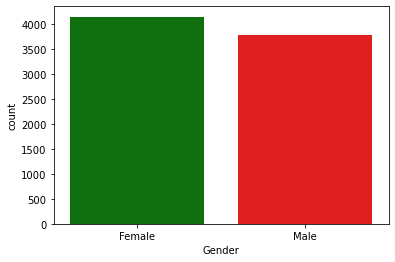

In [2440]:
countplot(x='Gender', data=GenderLte30AndWeightGtet90AndMeansTrans1, palette=['green','red'])
xlabel('Gender')
show()

In [2441]:
GenderLte30AndWeightGtet90AndMeansTrans1['Means of transportation used'].value_counts()

Public_Transportation    7449
Automobile                494
Name: Means of transportation used, dtype: int64

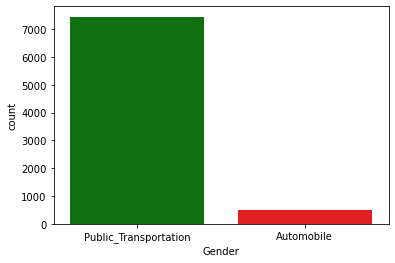

In [2442]:
countplot(x='Means of transportation used', data=GenderLte30AndWeightGtet90AndMeansTrans1, palette=['green','red'])
xlabel('Gender')
show()

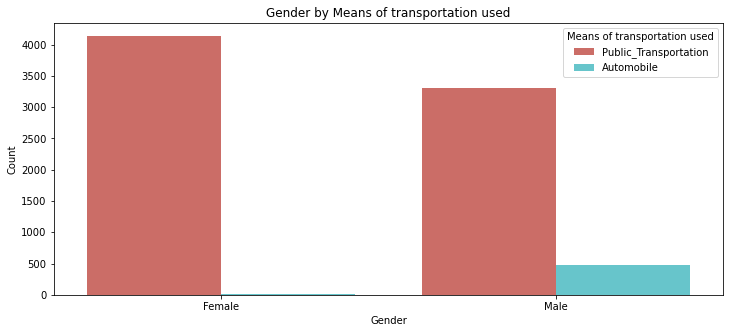

In [2443]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGtet90AndMeansTrans1, x='Gender', hue='Means of transportation used', palette="hls")
title('Gender by Means of transportation used')
xlabel('Gender')
ylabel('Count')
show()

### **Pour les femmes** :

- ##### **Transports en commun** : La grande majorité des femmes dans le jeu de données déclarent utiliser les transports en commun. Le nombre est très élevé, autour de 4150.
- ##### **Automobile** : Très peu de femmes déclarent utiliser une automobile comme moyen de transport. Le nombre est extrêmement faible, proche de zéro.

### **Pour les hommes** :

- ##### **Transports en commun** : Un nombre important d’hommes déclarent également utiliser les transports en commun, avec un effectif d’environ 3300. Ce chiffre reste inférieur à celui des femmes utilisant les transports en commun.
- ##### **Automobile** : Un nombre non négligeable d’hommes déclarent utiliser l’automobile, avec un effectif d’environ 500. Ce nombre est nettement plus élevé que celui des femmes utilisant ce mode de transport.

### **Observations générales** :

- ##### Les transports en commun sont le mode de transport dominant pour les deux sexes dans le jeu de données. Cependant, ils sont nettement plus utilisés par les femmes.
- ##### L’usage de l’automobile est beaucoup plus courant chez les hommes que chez les femmes.

### **En résumé, ce graphique suggère que** :

- ##### Les femmes de ce jeu de données dépendent massivement des transports en commun.
- ##### Bien que les transports en commun soient aussi majoritaires chez les hommes, une proportion non négligeable d’entre eux utilisent l’automobile.
- ##### Il existe une différence nette entre les sexes quant à la préférence ou à l’accès à l’automobile comme moyen de transport dans cette population.


---------------------

- ##### **Gender** with **Age <= 30** and **Weight >= 90** and **Means of transportation used = Walking** or **Bike** or **Motorbike**

In [2444]:
GenderLte30AndWeightGte90AndMeansTrans2 = train_df.loc[(train_df['Age'] < 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Means of transportation used'] == 'Walking') | (train_df['Means of transportation used'] == 'Bike') | (train_df['Means of transportation used'] == 'Motorbike')) , 
             (['Age','Gender','Weight','Means of transportation used'])]

In [2445]:
GenderLte30AndWeightGte90AndMeansTrans2

,Age,Gender,Weight,Means of transportation used
639,17,Male,98.000000,Walking
950,26,Male,90.000000,Walking
1288,17,Male,113.000000,Walking
1477,17,Male,97.000000,Walking
1641,17,Male,97.000000,Walking
2285,23,Male,95.000000,Walking
3482,24,Male,90.000000,Walking
3886,23,Male,105.000000,Walking
5020,23,Male,97.000000,Walking
5621,21,Male,96.000000,Motorbike


In [2446]:
GenderLte30AndWeightGte90AndMeansTrans2['Gender'].value_counts()

Male    43
Name: Gender, dtype: int64

In [2447]:
GenderLte30AndWeightGte90AndMeansTrans2['Means of transportation used'].value_counts()

Walking      38
Motorbike     4
Bike          1
Name: Means of transportation used, dtype: int64

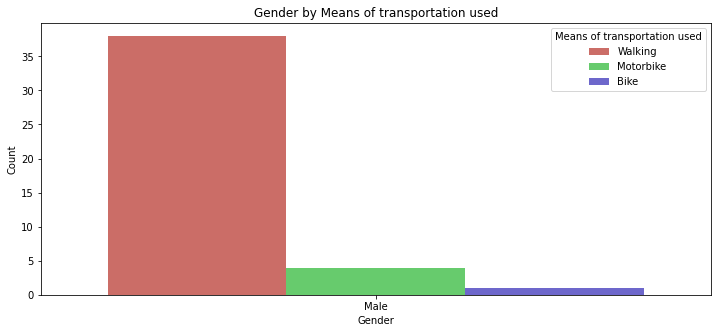

In [2448]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGte90AndMeansTrans2, x='Gender', hue='Means of transportation used', palette="hls")
title('Gender by Means of transportation used')
xlabel('Gender')
ylabel('Count')
show()

### **Pour les hommes** :

- ##### **Walking (Barre rouge)** : Walking est le moyen de transport le plus fréquemment rapporté parmi les hommes dans ce graphique, avec un effectif d’environ 38.
- ##### **Motorbike (Barre verte)** : L’usage du Motorbike est nettement moins fréquent que Walking, avec un effectif d’environ 4.
- ##### **Bike (Barre bleue)** : L’utilisation du Bike est la moins fréquente parmi ces trois options, avec seulement 1 cas rapporté.

### **Observations générales pour les hommes (selon ce graphique)** :

- ##### Walking est la forme de transport non motorisé/léger la plus courante chez les hommes dans ce sous-ensemble de données.
- ##### L’utilisation du Motorbike est présente mais bien inférieure à celle de Walking.
- ##### L’usage du Bike est très limité chez les hommes représentés ici.

### **Points importants à considérer** :

- ##### Ce graphique ne montre que les données concernant les hommes. Il n’y a pas d’informations sur les femmes et leur utilisation de ces moyens de transport dans cette visualisation spécifique.
- ##### L’échelle de l’axe des ordonnées (Count) est relativement faible (jusqu’à 40). Cela suggère que ce graphique pourrait se concentrer sur un sous-ensemble spécifique de ton jeu de données ou que ces modes de transport sont peu courants dans la population étudiée, du moins pour les hommes.
- ##### Cela contraste avec le graphique précédent qui portait sur Public Transportation et Automobile.

### **En résumé, pour les hommes représentés dans ce graphique spécifique :**

- ##### Walking est le moyen de transport le plus courant parmi les trois présentés.
- ##### L’utilisation du Motorbike est présente mais nettement inférieure.
- ##### L’usage du Bike est très rare.


--------------------

- ##### **Gender** with **Age > 30** and **Weight >= 90** and **Number of main meals the person eats per day = 3** or **4** 

In [2449]:
GenderGt30AndWeightGte90AndNumberMealsPerDay1 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Number of main meals the person eats per day'] == 3) | (train_df['Number of main meals the person eats per day'] == 4)) , 
             (['Age','Gender','Weight','Number of main meals the person eats per day'])]

In [2450]:
GenderGt30AndWeightGte90AndNumberMealsPerDay1

,Age,Gender,Weight,Number of main meals the person eats per day
46,31,Male,120.998266,3
102,31,Male,122.813033,3
203,35,Female,90.000000,3
206,32,Male,120.158049,3
208,32,Male,119.441207,3
...,...,...,...,...
20553,32,Male,128.114161,3
20583,34,Male,91.059595,3
20598,31,Male,112.277567,3
20635,31,Male,120.919703,3


In [2451]:
GenderGt30AndWeightGte90AndNumberMealsPerDay1['Gender'].value_counts()

Male      756
Female      4
Name: Gender, dtype: int64

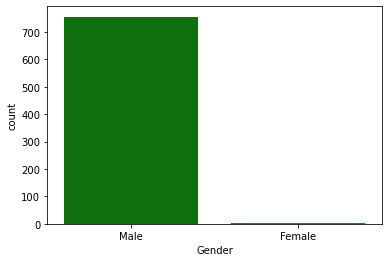

In [2452]:
countplot(x='Gender', data=GenderGt30AndWeightGte90AndNumberMealsPerDay1, palette=['green','red'])
xlabel('Gender')
show()

In [2453]:
GenderGt30AndWeightGte90AndNumberMealsPerDay1['Number of main meals the person eats per day'].value_counts()

3    754
4      6
Name: Number of main meals the person eats per day, dtype: int64

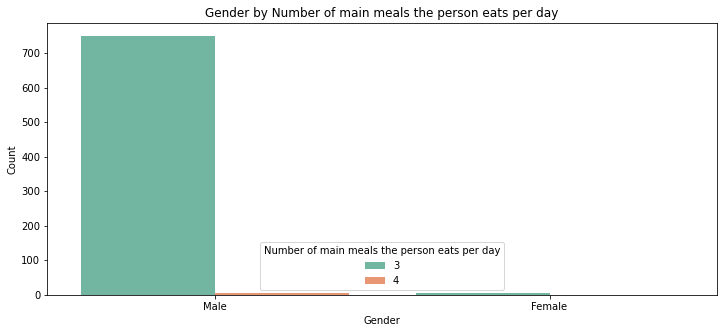

In [2454]:
figure(figsize=(12,	5))
countplot(data=GenderGt30AndWeightGte90AndNumberMealsPerDay1, x='Gender', hue='Number of main meals the person eats per day', palette="Set2")
title('Gender by Number of main meals the person eats per day')
xlabel('Gender')
ylabel('Count')
show()

### **For Males**:

- ##### **3 main meals per day (Teal Bar)**: A very high number of males reported eating 3 main meals per day, with a count of approximately 760.
- ##### **4 main meals per day (Salmon Bar)**: A very small number of males reported eating 4 main meals per day, with a count of less than 10.

### **For Females**:

- ##### **3 main meals per day (Teal Bar)**: A very small number of females reported eating 3 main meals per day, with a count of less than 10.
- ##### **4 main meals per day (Salmon Bar)**: The chart doesn't show a bar for females eating 4 main meals, implying the count is either zero or too small to be visible.

### Overall Observations:

- ##### Eating 3 main meals per day is overwhelmingly more common than eating 4 main meals per day in this subset of your data.
- ##### Males are much more likely to report eating 3 main meals per day compared to females.
- ##### Eating 4 main meals per day appears to be very rare for both genders in this specific view, but slightly more prevalent among the few who reported it were males.

### **Important Considerations**:

- ##### This chart only shows data for individuals reporting exactly 3 or 4 main meals. It doesn't include those who might eat fewer than 3 or more than 4 main meals.
- ##### The counts for females in both categories (and males eating 4 meals) are very low. This might indicate a genuine trend in your data or could be due to a smaller sample size for these specific categories.

### **In summary, based on this chart**:

- ##### The vast majority of individuals reporting their meal frequency as either 3 or 4 main meals per day are males eating 3 meals.
- ##### Eating 4 main meals is uncommon.
- ##### Females in this specific view predominantly (almost exclusively) do not fall into either the "3 main meals" or "4 main meals" category - as represented here, suggesting they might have reported a different number of main meals.

-----------------------

- ##### **Gender** with **Age <= 30** and **Weight >= 90** and **Number of main meals the person eats per day = 3** or **4** 

In [2455]:
GenderLte30AndWeightGte90AndNumberMealsPerDay2 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Number of main meals the person eats per day'] == 3) | (train_df['Number of main meals the person eats per day'] == 4)) , 
             (['Age','Gender','Weight','Number of main meals the person eats per day'])]

In [2456]:
GenderLte30AndWeightGte90AndNumberMealsPerDay2

,Age,Gender,Weight,Number of main meals the person eats per day
3,21,Female,131.274851,3
6,30,Male,112.725005,3
7,30,Male,118.206565,3
9,26,Female,111.275646,3
13,21,Female,131.529267,3
...,...,...,...,...
20749,26,Female,104.835346,3
20751,21,Female,133.466763,3
20753,25,Male,114.187096,3
20755,20,Male,105.580491,3


In [2457]:
GenderLte30AndWeightGte90AndNumberMealsPerDay2['Gender'].value_counts()

Female    4134
Male      3242
Name: Gender, dtype: int64

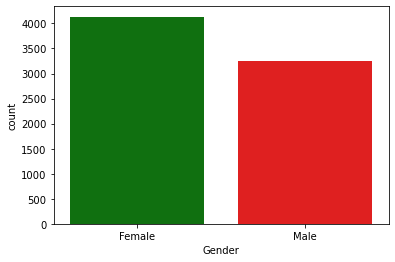

In [2458]:
countplot(x='Gender', data=GenderLte30AndWeightGte90AndNumberMealsPerDay2, palette=['green','red'])
xlabel('Gender')
show()

In [2459]:
GenderLte30AndWeightGte90AndNumberMealsPerDay2['Number of main meals the person eats per day'].value_counts()

3    7355
4      21
Name: Number of main meals the person eats per day, dtype: int64

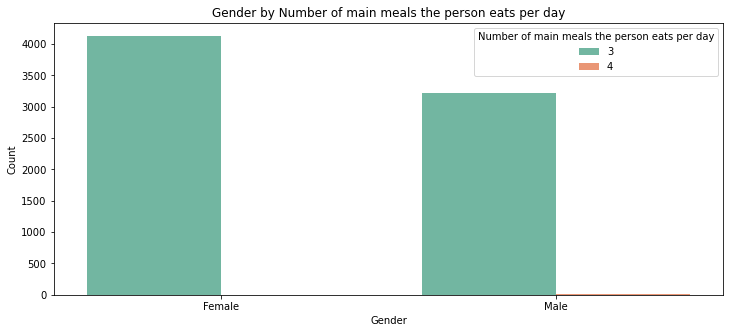

In [2460]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGte90AndNumberMealsPerDay2, x='Gender', hue='Number of main meals the person eats per day', palette="Set2")
title('Gender by Number of main meals the person eats per day')
xlabel('Gender')
ylabel('Count')
show()

### **For Females**:

- ##### **3 main meals per day (Teal Bar)**: A very high number of females reported eating 3 main meals per day, with a count of approximately 4150.
- ##### **4 main meals per day (Salmon Bar)**: A very small number of females reported eating 4 main meals per day, with a count very close to zero.

### **For Males**:

- ##### **3 main meals per day (Teal Bar)**: A substantial number of males also reported eating 3 main meals per day, with a count of approximately 3200. This is lower than the number of females reporting 3 meals.
- ##### **4 main meals per day (Salmon Bar)**: A very small number of males also reported eating 4 main meals per day, with a count very close to zero.

### **Overall Observations**:

- ##### Eating 3 main meals per day is the overwhelmingly dominant pattern for both genders in this view of data.
- ##### Females are more likely to report eating 3 main meals per day compared to males.
- ##### Eating 4 main meals per day is very rare for both genders based on this chart.

### **Comparison with the Previous Chart:**

- ##### The counts in this chart are significantly higher than in the previous one, suggesting this might represent a larger portion of dataset.
- ##### The trend remains the same: 3 main meals are much more common than 4, and females show a higher count for 3 meals compared to males.

### **In summary, based on this chart**:

- ##### The vast majority of both males and females in this dataset report eating 3 main meals per day.
- ##### A very small fraction of both genders report eating 4 main meals per day.
- ##### Females have a higher frequency of reporting 3 main meals per day compared to males.

--------------------------------------

- ##### **Gender** with **Age > 30** and **Weight >= 90** and **Physical activity frequency Classes = No physical activity** or **Very low activity** 

In [2461]:
GenderGt30AndWeightGte90AndPhysicalActivity1 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Physical activity frequency Classes'] == 'No physical activity') | (train_df['Physical activity frequency Classes'] == 'Very low activity')) , 
             (['Age','Gender','Weight','Physical activity frequency Classes'])]

In [2462]:
GenderGt30AndWeightGte90AndPhysicalActivity1

,Age,Gender,Weight,Physical activity frequency Classes
4,32,Male,93.798055,Very low activity
46,31,Male,120.998266,Very low activity
102,31,Male,122.813033,No physical activity
103,32,Male,90.000000,Very low activity
203,35,Female,90.000000,Very low activity
...,...,...,...,...
20547,31,Male,118.424156,No physical activity
20553,32,Male,128.114161,No physical activity
20598,31,Male,112.277567,No physical activity
20635,31,Male,120.919703,No physical activity


In [2463]:
GenderGt30AndWeightGte90AndPhysicalActivity1['Gender'].value_counts()

Male      926
Female      6
Name: Gender, dtype: int64

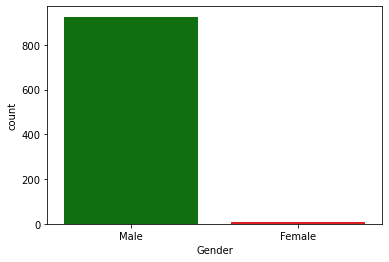

In [2464]:
countplot(x='Gender', data=GenderGt30AndWeightGte90AndPhysicalActivity1, palette=['green','red'])
xlabel('Gender')
show()

In [2465]:
GenderGt30AndWeightGte90AndPhysicalActivity1['Physical activity frequency Classes'].value_counts()

No physical activity    494
Very low activity       438
Name: Physical activity frequency Classes, dtype: int64

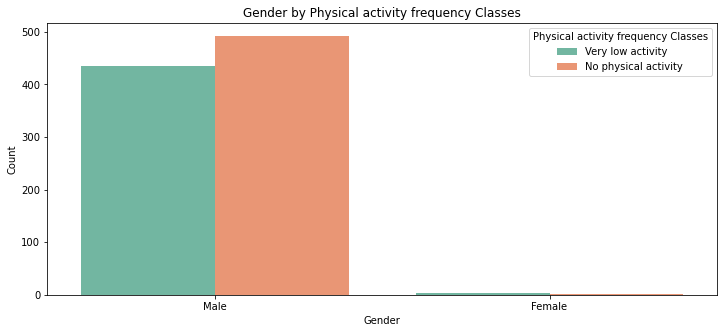

In [2466]:
figure(figsize=(12,	5))
countplot(data=GenderGt30AndWeightGte90AndPhysicalActivity1, x='Gender', hue='Physical activity frequency Classes', palette="Set2")
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
ylabel('Count')
show()

### **For Males**:

- ##### **Very low activity (Teal Bar):** A significant number of males are classified as having "Very low activity," with a count of approximately 435.
- ##### **No physical activity (Salmon Bar)**: An even larger number of males are classified as having "No physical activity," with a count of approximately 490.

### **For Females**:

- ##### **Very low activity (Teal Bar)**: A very small number of females are classified as having "Very low activity," with a count close to zero but slightly above it.
- ##### **No physical activity (Salmon Bar)**: A very small number of females are also classified as having "No physical activity," with a count close to zero but slightly above it.

### **Overall Observations (focusing on these two activity levels)**:

- ##### **For males**, "No physical activity" is slightly more prevalent than "Very low activity."
- ##### **For females**, both "Very low activity" and "No physical activity" are very rare compared to males. The counts are close to zero on the scale of this chart.
- ##### There is a substantial gender difference in the prevalence of these lower levels of physical activity. Males show considerably higher counts in both the "Very low activity" and "No physical activity" categories compared to females.

- ##### Important Considerations:

- ##### This chart only focuses on two specific categories of physical activity frequency. It doesn't provide information about individuals with "Low to moderate activity" or "Moderate activity."
- ##### The scale of the y-axis (Count) goes up to 500. This allows us to see the relative differences between male counts and the very low female counts.

### **In summary, based on this chart**:

- ##### Among males, "No physical activity" is slightly more common than "Very low activity."
- ##### Both "Very low activity" and "No physical activity" appear to be uncommon among females in this specific view of the data.
- ##### Males in this dataset are much more likely to report either "Very low activity" or "No physical activity" compared to females.

--------------------------------------

- ##### **Gender** with **Age <= 30** and **Weight >= 90** and **Physical activity frequency Classes = No physical activity** or **Very low activity** 

In [2467]:
GenderLte30AndWeightGte90AndPhysicalActivity1 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Physical activity frequency Classes'] == 'No physical activity') | (train_df['Physical activity frequency Classes'] == 'Very low activity')) , 
             (['Age','Gender','Weight','Physical activity frequency Classes'])]

In [2468]:
GenderLte30AndWeightGte90AndPhysicalActivity1

,Age,Gender,Weight,Physical activity frequency Classes
3,21,Female,131.274851,Very low activity
6,30,Male,112.725005,No physical activity
7,30,Male,118.206565,No physical activity
9,26,Female,111.275646,No physical activity
12,18,Male,108.251044,Very low activity
...,...,...,...,...
20749,26,Female,104.835346,No physical activity
20751,21,Female,133.466763,Very low activity
20753,25,Male,114.187096,Very low activity
20755,20,Male,105.580491,Very low activity


In [2469]:
GenderLte30AndWeightGte90AndPhysicalActivity1['Gender'].value_counts()

Female    4133
Male      3422
Name: Gender, dtype: int64

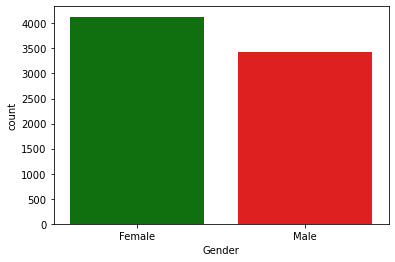

In [2470]:
countplot(x='Gender', data=GenderLte30AndWeightGte90AndPhysicalActivity1, palette=['green','red'])
xlabel('Gender')
show()

In [2471]:
GenderLte30AndWeightGte90AndPhysicalActivity1['Physical activity frequency Classes'].value_counts()

No physical activity    4351
Very low activity       3204
Name: Physical activity frequency Classes, dtype: int64

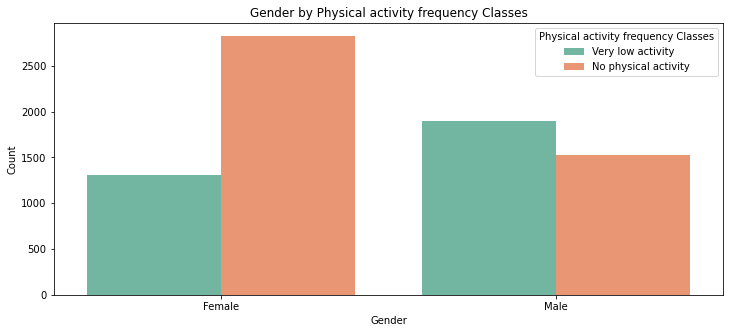

In [2472]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGte90AndPhysicalActivity1, x='Gender', hue='Physical activity frequency Classes', palette="Set2")
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
ylabel('Count')
show()

### **For Females**:

- ##### **Very low activity (Teal Bar)**: Approximately 1300 females are classified as having "Very low activity."
- ##### **No physical activity (Salmon Bar)**: A much larger number of females are classified as having "No physical activity," with a count of around 2850.

### **For Males**:

- ##### **Very low activity (Teal Bar)**: Approximately 1900 males are classified as having "Very low activity." This is higher than the number of females in the same category.
- ##### **No physical activity (Salmon Bar)**: Approximately 1500 males are classified as having "No physical activity." This is lower than the number of females in the same category.

### **Overall Observations (focusing on these two activity levels)**:

- ##### **For females**, "No physical activity" is significantly more prevalent than "Very low activity."
- ##### **For males**, "Very low activity" is more prevalent than "No physical activity."
- ##### There is a clear gender difference in the distribution of these lower levels of physical activity. A higher proportion of females in this view report "No physical activity," while a higher proportion of males report "Very low activity."

### **Important Considerations**:

- ##### This chart only focuses on two specific categories of physical activity frequency. It doesn't provide information about individuals with "Low to moderate activity" or "Moderate activity."
- ##### The scale of the y-axis (Count) goes up to 3000. This allows us to see the substantial counts in these categories.

### **In summary, based on this chart**:

- ##### **Among females**, the dominant lower physical activity level is "No physical activity."
- ##### **Among males**, the more common lower physical activity level is "Very low activity."
- ##### Females in dataset are more likely to report "No physical activity" compared to males, while males are more likely to report "Very low activity" compared to females, within these two categories.

--------------------------------------

- ##### **Gender** with **Age > 30** and **Weight >= 90** and **Physical activity frequency Classes = Low to moderate activity** or **Moderate activity** 

In [2473]:
GenderGt30AndWeightGte90AndPhysicalActivity2 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Physical activity frequency Classes'] == 'Low to moderate activity') | (train_df['Physical activity frequency Classes'] == 'Moderate activity')) , 
             (['Age','Gender','Weight','Physical activity frequency Classes'])]

In [2474]:
GenderGt30AndWeightGte90AndPhysicalActivity2

,Age,Gender,Weight,Physical activity frequency Classes
460,33,Male,97.000000,Low to moderate activity
2612,34,Male,90.000000,Low to moderate activity
3547,33,Male,97.000000,Low to moderate activity
4438,34,Male,120.000000,Low to moderate activity
5920,32,Male,102.781971,Low to moderate activity
5923,34,Male,98.790167,Low to moderate activity
6454,33,Male,97.813023,Low to moderate activity
6460,33,Male,97.544696,Low to moderate activity
7186,33,Male,97.592949,Low to moderate activity
7474,33,Male,97.000000,Moderate activity


In [2475]:
GenderGt30AndWeightGte90AndPhysicalActivity2['Gender'].value_counts()

Male    29
Name: Gender, dtype: int64

In [2476]:
GenderGt30AndWeightGte90AndPhysicalActivity2['Physical activity frequency Classes'].value_counts()

Low to moderate activity    27
Moderate activity            2
Name: Physical activity frequency Classes, dtype: int64

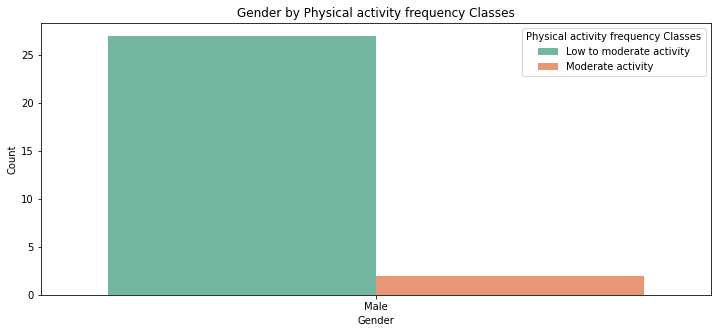

In [2477]:
figure(figsize=(12,	5))
countplot(data=GenderGt30AndWeightGte90AndPhysicalActivity2, x='Gender', hue='Physical activity frequency Classes', palette="Set2")
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
ylabel('Count')
show()

### **For Males**:

- ##### **Low to moderate activity (Teal Bar)**: Approximately 27 males are classified as having "Low to moderate activity."
- ##### **Moderate activity (Salmon Bar)**: Approximately 2 males are classified as having "Moderate activity."

### Overall Observations for Males (based on this chart):

- ##### Within these two higher activity categories, "Low to moderate activity" is significantly more prevalent among males compared to "Moderate activity."

### **Important Considerations**:

- ##### This chart only shows data for males. There is no information about females and their activity levels in these categories in this particular visualization.
- ##### The scale of the y-axis (Count) is relatively small (up to 30). This suggests that these higher activity levels might be less common in the male subset represented here compared to the lower activity levels we saw in previous charts.
- ##### This is another slice of the overall physical activity frequency data by gender.

### **In summary, for the males represented in this specific chart**:

- ##### "Low to moderate activity" is reported by a noticeable number of individuals.
- ##### "Moderate activity" is reported by a much smaller number of individuals.

--------------------------------------

- ##### **Gender** with **Age <= 30** and **Weight >= 90** and **Physical activity frequency Classes = Low to moderate activity** or **Moderate activity** 

In [2478]:
GenderLte30AndWeightGte90AndPhysicalActivity2 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Physical activity frequency Classes'] == 'Low to moderate activity') | (train_df['Physical activity frequency Classes'] == 'Moderate activity')) , 
             (['Age','Gender','Weight','Physical activity frequency Classes'])]

In [2479]:
GenderLte30AndWeightGte90AndPhysicalActivity2

,Age,Gender,Weight,Physical activity frequency Classes
31,23,Male,97.000000,Moderate activity
79,22,Male,105.000000,Low to moderate activity
99,18,Male,95.000000,Low to moderate activity
110,22,Male,95.000000,Moderate activity
143,20,Male,105.025808,Low to moderate activity
...,...,...,...,...
20550,26,Male,103.000000,Moderate activity
20614,18,Male,90.000000,Low to moderate activity
20713,25,Male,114.000000,Low to moderate activity
20729,22,Male,98.447311,Low to moderate activity


In [2480]:
GenderLte30AndWeightGte90AndPhysicalActivity2['Gender'].value_counts()

Male      413
Female     18
Name: Gender, dtype: int64

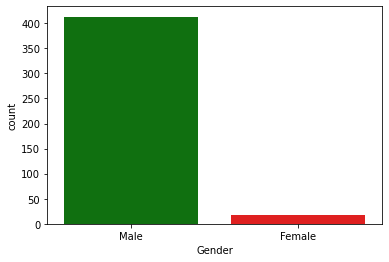

In [2481]:
countplot(x='Gender', data=GenderLte30AndWeightGte90AndPhysicalActivity2, palette=['green','red'])
xlabel('Gender')
show()

In [2482]:
GenderLte30AndWeightGte90AndPhysicalActivity2['Physical activity frequency Classes'].value_counts()

Low to moderate activity    288
Moderate activity           143
Name: Physical activity frequency Classes, dtype: int64

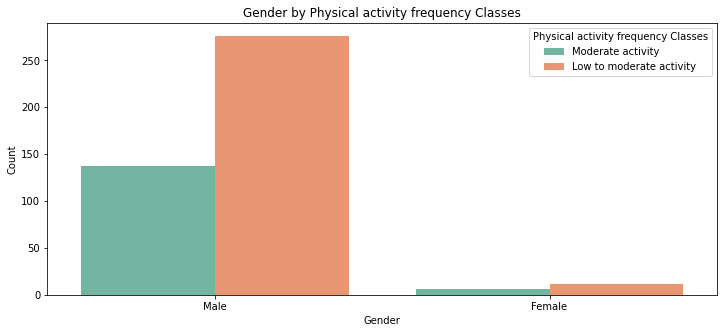

In [2483]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGte90AndPhysicalActivity2, x='Gender', hue='Physical activity frequency Classes', palette="Set2")
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
ylabel('Count')
show()

### **For Males**:

- ##### **Moderate activity (Teal Bar)**: Approximately 135 males are classified as having "Moderate activity."
- ##### **Low to moderate activity (Salmon Bar)**: A much larger number of males are classified as having "Low to moderate activity," with a count of around 280.

### **For Females**:

- ##### **Moderate activity (Teal Bar)**: A very small number of females are classified as having "Moderate activity," with a count of less than 10.
- ##### **Low to moderate activity (Salmon Bar)**: A small number of females are classified as having "Low to moderate activity," with a count of around 12.

### **Overall Observations (focusing on these two activity levels)**:

- ##### **For males**, "Low to moderate activity" is considerably more prevalent than "Moderate activity."
- ##### **For females**, both "Moderate activity" and "Low to moderate activity" have very low counts compared to males.
- ##### There is a substantial gender difference in the prevalence of these higher levels of physical activity. Males show much higher counts in both the "Moderate activity" and "Low to moderate activity" categories compared to females.

### **Important Considerations:**

- ##### This chart only focuses on two specific categories of physical activity frequency. It doesn't provide information about individuals with "No physical activity" or "Very low activity."
- ##### The scale of the y-axis (Count) goes up to 300. This allows us to see the relative differences between male and female counts in these categories.

### **In summary, based on this chart**:

- ##### Among males, "Low to moderate activity" is the more common of the two higher activity levels shown.
- ##### Both "Moderate activity" and "Low to moderate activity" are relatively rare among females in this specific view of the data.
- ##### Males in dataset are much more likely to report "Moderate activity" or "Low to moderate activity" compared to females.

------------------------
-----------------------

## **Transform Data**

-----------------------

##### **Spliting data to number and object**

In [2484]:
object_train_data = train_df.select_dtypes(include='object')
non_object_train_data = train_df.select_dtypes(exclude='object')

In [2485]:
object_train_data

,Gender,Family history with overweight,Frequent consumption of high-caloric food,Consumption of food between meals,SMOKE,Whether the person takes calorie supplements,Alcohol consumption,Means of transportation used,Obesity level class,Frequency of vegetable consumption Classes,Number of main meals the person eats per day Classes,Daily water consumption Classes,Physical activity frequency Classes,Time spent using technology Classes
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,Sometimes consumes vegetables,Three meals per day,Moderate water intake,No physical activity,Very low screen time
1,Female,yes,yes,Frequently,no,no,no,Automobile,Normal_Weight,Sometimes consumes vegetables,Three meals per day,Moderate water intake,Very low activity,Very low screen time
2,Female,yes,yes,Sometimes,no,no,no,Public_Transportation,Insufficient_Weight,Sometimes consumes vegetables,One meal per day,Low water intake,No physical activity,Very low screen time
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,Regularly consumes vegetables,Three meals per day,Low water intake,Very low activity,Very low screen time
4,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,Regularly consumes vegetables,Two meals per day,Low water intake,Very low activity,Very low screen time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_II,Regularly consumes vegetables,Three meals per day,Moderate water intake,Very low activity,Very low screen time
20754,Male,no,yes,Frequently,no,no,Sometimes,Public_Transportation,Insufficient_Weight,Regularly consumes vegetables,More than three meals,Low water intake,Low to moderate activity,Very low screen time
20755,Male,yes,yes,Sometimes,no,no,no,Public_Transportation,Obesity_Type_II,Sometimes consumes vegetables,Three meals per day,Moderate water intake,Very low activity,Very low screen time
20756,Male,yes,yes,Sometimes,no,no,no,Automobile,Overweight_Level_II,Regularly consumes vegetables,Two meals per day,Moderate water intake,No physical activity,Very low screen time


##### **Spliting object data to object data with 2 uniques and object data Gt 2 uniques**

In [2486]:
for col in object_train_data.columns:
    if object_train_data[col].nunique() == 2  :
        print(f'{col} : {object_train_data[col].nunique()}')

Gender : 2
Family history with overweight : 2
Frequent consumption of high-caloric food : 2
SMOKE : 2
Whether the person takes calorie supplements : 2
Time spent using technology Classes : 2


In [2487]:
object_train_data_with_2_uniques = object_train_data[['Gender','Family history with overweight','Frequent consumption of high-caloric food','SMOKE',
                                                      'Whether the person takes calorie supplements','Time spent using technology Classes']]

In [2488]:
label = LabelEncoder()
for col in range(0,object_train_data_with_2_uniques.shape[1]):
    object_train_data_with_2_uniques.iloc[:,col] = label.fit_transform(object_train_data_with_2_uniques.iloc[:,col])
object_train_data_with_2_uniques = object_train_data_with_2_uniques.astype(int)

C:\Users\Bassou Mouacha\AppData\Local\Temp\ipykernel_12844\597340240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_with_2_uniques.iloc[:,col] = label.fit_transform(object_train_data_with_2_uniques.iloc[:,col])


In [2489]:
object_train_data_with_2_uniques

,Gender,Family history with overweight,Frequent consumption of high-caloric food,SMOKE,Whether the person takes calorie supplements,Time spent using technology Classes
0,1,1,1,0,0,1
1,0,1,1,0,0,1
2,0,1,1,0,0,1
3,0,1,1,0,0,1
4,1,1,1,0,0,1
...,...,...,...,...,...,...
20753,1,1,1,0,0,1
20754,1,0,1,0,0,1
20755,1,1,1,0,0,1
20756,1,1,1,0,0,1


In [2490]:
object_train_data_with_2_uniques.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19729 entries, 0 to 20757
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Gender                                        19729 non-null  int32
 1   Family history with overweight                19729 non-null  int32
 2   Frequent consumption of high-caloric food     19729 non-null  int32
 3   SMOKE                                         19729 non-null  int32
 4   Whether the person takes calorie supplements  19729 non-null  int32
 5   Time spent using technology Classes           19729 non-null  int32
dtypes: int32(6)
memory usage: 616.5 KB


In [2491]:
# # saving label
# with open('label.pkl' , 'wb') as f :
#     dump(label, f)

-------------------------

In [2492]:
for col in object_train_data.columns:
    if object_train_data[col].nunique()  > 2 :
        print(f'{col} : {object_train_data[col].nunique()}')

Consumption of food between meals : 4
Alcohol consumption : 3
Means of transportation used : 5
Obesity level class : 7
Frequency of vegetable consumption Classes : 3
Number of main meals the person eats per day Classes : 4
Daily water consumption Classes : 3
Physical activity frequency Classes : 4


In [2493]:
object_train_data_Gt_2_nuniques = object_train_data[['Consumption of food between meals','Alcohol consumption','Means of transportation used','Obesity level class','Frequency of vegetable consumption Classes','Number of main meals the person eats per day Classes','Daily water consumption Classes','Physical activity frequency Classes']]

In [2494]:
object_train_data_Gt_2_nuniques

,Consumption of food between meals,Alcohol consumption,Means of transportation used,Obesity level class,Frequency of vegetable consumption Classes,Number of main meals the person eats per day Classes,Daily water consumption Classes,Physical activity frequency Classes
0,Sometimes,Sometimes,Public_Transportation,Overweight_Level_II,Sometimes consumes vegetables,Three meals per day,Moderate water intake,No physical activity
1,Frequently,no,Automobile,Normal_Weight,Sometimes consumes vegetables,Three meals per day,Moderate water intake,Very low activity
2,Sometimes,no,Public_Transportation,Insufficient_Weight,Sometimes consumes vegetables,One meal per day,Low water intake,No physical activity
3,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III,Regularly consumes vegetables,Three meals per day,Low water intake,Very low activity
4,Sometimes,Sometimes,Public_Transportation,Overweight_Level_II,Regularly consumes vegetables,Two meals per day,Low water intake,Very low activity
...,...,...,...,...,...,...,...,...
20753,Sometimes,Sometimes,Public_Transportation,Obesity_Type_II,Regularly consumes vegetables,Three meals per day,Moderate water intake,Very low activity
20754,Frequently,Sometimes,Public_Transportation,Insufficient_Weight,Regularly consumes vegetables,More than three meals,Low water intake,Low to moderate activity
20755,Sometimes,no,Public_Transportation,Obesity_Type_II,Sometimes consumes vegetables,Three meals per day,Moderate water intake,Very low activity
20756,Sometimes,no,Automobile,Overweight_Level_II,Regularly consumes vegetables,Two meals per day,Moderate water intake,No physical activity


--------------------------

In [2495]:
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].value_counts()

Regularly consumes vegetables    9783
Sometimes consumes vegetables    9196
Rarely consumes vegetables        750
Name: Frequency of vegetable consumption Classes, dtype: int64

In [2496]:
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].replace('Rarely consumes vegetables',0)
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].replace('Sometimes consumes vegetables',1)
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].replace('Regularly consumes vegetables',2)

C:\Users\Bassou Mouacha\AppData\Local\Temp\ipykernel_12844\160115314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].replace('Rarely consumes vegetables',0)
C:\Users\Bassou Mouacha\AppData\Local\Temp\ipykernel_12844\160115314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Class

In [2497]:
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].value_counts()


2    9783
1    9196
0     750
Name: Frequency of vegetable consumption Classes, dtype: int64

------------------------

In [2498]:
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].value_counts()

Three meals per day      15521
One meal per day          2357
More than three meals     1030
Two meals per day          821
Name: Number of main meals the person eats per day Classes, dtype: int64

In [2499]:

object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('One meal per day',0)
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('Two meals per day',1)
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('Three meals per day',2)
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('More than three meals',3)

C:\Users\Bassou Mouacha\AppData\Local\Temp\ipykernel_12844\1069382970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('One meal per day',0)
C:\Users\Bassou Mouacha\AppData\Local\Temp\ipykernel_12844\1069382970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Number of main meals the per

In [2500]:
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].value_counts()

2    15521
0     2357
3     1030
1      821
Name: Number of main meals the person eats per day Classes, dtype: int64

--------------------------------

In [2501]:
object_train_data_Gt_2_nuniques['Daily water consumption Classes'].value_counts()

Moderate water intake    12601
Low water intake          5599
High water intake         1529
Name: Daily water consumption Classes, dtype: int64

In [2502]:

object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption Classes'].replace('Low water intake',0)
object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption Classes'].replace('Moderate water intake',1)
object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption Classes'].replace('High water intake',2)

C:\Users\Bassou Mouacha\AppData\Local\Temp\ipykernel_12844\4278355402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption Classes'].replace('Low water intake',0)
C:\Users\Bassou Mouacha\AppData\Local\Temp\ipykernel_12844\4278355402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Da

In [2503]:
object_train_data_Gt_2_nuniques['Daily water consumption Classes'].value_counts()


1    12601
0     5599
2     1529
Name: Daily water consumption Classes, dtype: int64

----------------------------------------

In [2504]:
object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].value_counts()

No physical activity        8514
Very low activity           7657
Low to moderate activity    2784
Moderate activity            774
Name: Physical activity frequency Classes, dtype: int64

In [2505]:
object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('No physical activity',0)
object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('Very low activity',1)
object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('Low to moderate activity',2)
object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('Moderate activity',3)

C:\Users\Bassou Mouacha\AppData\Local\Temp\ipykernel_12844\1857606638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('No physical activity',0)
C:\Users\Bassou Mouacha\AppData\Local\Temp\ipykernel_12844\1857606638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_G

In [2506]:
object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].value_counts()

0    8514
1    7657
2    2784
3     774
Name: Physical activity frequency Classes, dtype: int64

---------------------------

In [2507]:
object_train_data_Gt_2_nuniques['Consumption of food between meals'].value_counts()

Sometimes     16566
Frequently     2425
Always          460
no              278
Name: Consumption of food between meals, dtype: int64

In [2508]:
object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('no',0)
object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('Sometimes',1)
object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('Frequently',2)
object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('Always',3)

C:\Users\Bassou Mouacha\AppData\Local\Temp\ipykernel_12844\3469034432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('no',0)
C:\Users\Bassou Mouacha\AppData\Local\Temp\ipykernel_12844\3469034432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumptio

In [2509]:
object_train_data_Gt_2_nuniques['Consumption of food between meals'].value_counts()

1    16566
2     2425
3      460
0      278
Name: Consumption of food between meals, dtype: int64

-------------------------

In [2510]:
object_train_data_Gt_2_nuniques['Alcohol consumption'].value_counts()


Sometimes     14386
no             4872
Frequently      471
Name: Alcohol consumption, dtype: int64

In [2511]:
object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('no',0)
object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('Sometimes',1)
object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('Frequently',2)

C:\Users\Bassou Mouacha\AppData\Local\Temp\ipykernel_12844\1355582882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('no',0)
C:\Users\Bassou Mouacha\AppData\Local\Temp\ipykernel_12844\1355582882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('Sometimes',1)
C:\User

In [2512]:
object_train_data_Gt_2_nuniques['Alcohol consumption'].value_counts()

1    14386
0     4872
2      471
Name: Alcohol consumption, dtype: int64

------------------------------

In [2513]:
object_train_data_Gt_2_nuniques['Means of transportation used'].value_counts()

Public_Transportation    16669
Automobile                2537
Walking                    461
Motorbike                   32
Bike                        30
Name: Means of transportation used, dtype: int64

In [2514]:
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Public_Transportation',0)
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Automobile',1)
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Walking',2)
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Motorbike',3)
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Bike',4)

C:\Users\Bassou Mouacha\AppData\Local\Temp\ipykernel_12844\671721201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Public_Transportation',0)
C:\Users\Bassou Mouacha\AppData\Local\Temp\ipykernel_12844\671721201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of

In [2515]:
object_train_data_Gt_2_nuniques['Means of transportation used'].value_counts()

0    16669
1     2537
2      461
3       32
4       30
Name: Means of transportation used, dtype: int64

----------------------

In [2516]:
object_train_data_Gt_2_nuniques['Obesity level class'].value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3067
Normal_Weight          3062
Insufficient_Weight    2516
Obesity_Type_I         2425
Overweight_Level_II    2325
Overweight_Level_I     2288
Name: Obesity level class, dtype: int64

In [2517]:
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Insufficient_Weight',0)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Normal_Weight',1)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Overweight_Level_I',2)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Overweight_Level_II',3)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Obesity_Type_I',4)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Obesity_Type_II',5)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Obesity_Type_III',6)

C:\Users\Bassou Mouacha\AppData\Local\Temp\ipykernel_12844\3380256162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Insufficient_Weight',0)
C:\Users\Bassou Mouacha\AppData\Local\Temp\ipykernel_12844\3380256162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('No

In [2518]:
object_train_data_Gt_2_nuniques['Obesity level class'].value_counts()

6    4046
5    3067
1    3062
0    2516
4    2425
3    2325
2    2288
Name: Obesity level class, dtype: int64

---------------------

In [2519]:
df=concat([non_object_train_data, object_train_data_with_2_uniques, object_train_data_Gt_2_nuniques],axis=1)

In [2520]:
df

,Age,Height,Weight,Frequency of vegetable consumption,Number of main meals the person eats per day,Daily water consumption,Physical activity frequency,Time spent using technology,Gender,Family history with overweight,...,Whether the person takes calorie supplements,Time spent using technology Classes,Consumption of food between meals,Alcohol consumption,Means of transportation used,Obesity level class,Frequency of vegetable consumption Classes,Number of main meals the person eats per day Classes,Daily water consumption Classes,Physical activity frequency Classes
0,24,1.699998,81.669950,2,3,2.763573,0.000000,0.976473,1,1,...,0,1,1,1,0,3,1,2,1,0
1,18,1.560000,57.000000,2,3,2.000000,1.000000,1.000000,0,1,...,0,1,2,0,1,1,1,2,1,1
2,18,1.711460,50.165754,2,1,1.910378,0.866045,1.673584,0,1,...,0,1,1,0,0,0,1,0,0,0
3,21,1.710730,131.274851,3,3,1.674061,1.467863,0.780199,0,1,...,0,1,1,1,0,6,2,2,0,1
4,32,1.914186,93.798055,3,2,1.979848,1.967973,0.931721,1,1,...,0,1,1,1,0,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25,1.766626,114.187096,3,3,2.151809,1.330519,0.196680,1,1,...,0,1,1,1,0,5,2,2,1,1
20754,18,1.710000,50.000000,3,4,1.000000,2.000000,1.000000,1,0,...,0,1,2,1,0,0,2,3,0,2
20755,20,1.819557,105.580491,2,3,2.000000,1.158040,1.198439,1,1,...,0,1,1,0,0,5,1,2,1,1
20756,34,1.700000,83.520113,3,2,2.144838,0.000000,0.973834,1,1,...,0,1,1,0,1,3,2,1,1,0


In [2521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19729 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Age                                                   19729 non-null  int64  
 1   Height                                                19729 non-null  float64
 2   Weight                                                19729 non-null  float64
 3   Frequency of vegetable consumption                    19729 non-null  int64  
 4   Number of main meals the person eats per day          19729 non-null  int32  
 5   Daily water consumption                               19729 non-null  float64
 6   Physical activity frequency                           19729 non-null  float64
 7   Time spent using technology                           19729 non-null  float64
 8   Gender                                                19

--------------------------
--------------------------
-------------------------

## **Model**

---------------------

### **Spliting Data to train data and test data**

------------------------------

In [2522]:
x = df.drop(['Obesity level class'],axis=1)
y = df['Obesity level class']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1234)

In [2523]:
print(f'x_train : {x_train.shape}   ,   x_test : {x_test.shape}')
print(f'y_train : {y_train.shape}   ,   y_test : {y_test.shape}')

x_train : (15783, 21)   ,   x_test : (3946, 21)
y_train : (15783,)   ,   y_test : (3946,)


----------------

### **Feature Scaling**

--------------------------

In [2524]:
scaler = StandardScaler()

x_train[['Age','Weight']] = scaler.fit_transform(x_train[['Age','Weight']])
x_test[['Age','Weight']] = scaler.fit_transform(x_test[['Age','Weight']])

In [2525]:
x_train

,Age,Height,Weight,Frequency of vegetable consumption,Number of main meals the person eats per day,Daily water consumption,Physical activity frequency,Time spent using technology,Gender,Family history with overweight,...,SMOKE,Whether the person takes calorie supplements,Time spent using technology Classes,Consumption of food between meals,Alcohol consumption,Means of transportation used,Frequency of vegetable consumption Classes,Number of main meals the person eats per day Classes,Daily water consumption Classes,Physical activity frequency Classes
12619,0.714914,1.635062,0.853249,3,3,1.184230,0.000000,0.436068,0,1,...,0,0,1,1,1,0,2,2,0,0
10036,-0.464257,1.580000,-1.160054,2,1,2.000000,0.000000,1.000000,0,1,...,0,0,1,1,0,0,1,0,1,0
20259,-0.700091,1.700000,-1.421374,2,3,1.000000,0.000000,2.000000,1,0,...,0,0,0,3,0,0,1,2,0,0
10652,-0.700091,1.660840,-1.457220,3,3,2.000000,0.000000,1.000000,0,0,...,0,0,1,2,1,0,2,2,1,0
11419,0.007411,1.755938,1.187397,2,3,2.174371,1.251665,0.840911,1,1,...,0,0,1,1,1,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8664,0.007411,1.859927,1.248845,3,3,1.797161,0.899864,1.898139,1,1,...,0,0,1,1,1,0,2,2,0,0
9959,1.894084,1.810215,1.381390,2,3,1.662117,0.992371,0.500936,1,1,...,1,0,1,1,1,0,1,2,0,0
8933,0.007411,1.707557,-0.466544,2,4,2.078297,0.774646,1.944177,1,1,...,0,0,1,1,1,0,1,3,1,0
17929,-0.935925,1.800000,-1.048060,2,3,2.000000,2.000000,1.000000,1,0,...,0,0,1,1,0,0,1,2,1,2


In [2526]:
# # saving scaling 
# with open('scaler.pkl' , 'wb') as f :
#     dump(scaler, f)

----------------------

## **Creating Model with ML algorithms for multi-class** 

--------------------------

In [2527]:
models = [
    LogisticRegression(multi_class='multinomial', max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(decision_function_shape='ovr'),
]

In [2528]:
def MultiClass(model):
    print(f"🔹 Model: {model}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [2529]:
MultiClass(models[0])

🔹 Model: LogisticRegression(max_iter=1000, multi_class='multinomial')
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       520
           1       0.81      0.85      0.83       608
           2       0.71      0.70      0.70       443
           3       0.71      0.67      0.69       488
           4       0.80      0.80      0.80       454
           5       0.93      0.96      0.95       625
           6       1.00      1.00      1.00       808

    accuracy                           0.86      3946
   macro avg       0.84      0.84      0.84      3946
weighted avg       0.86      0.86      0.86      3946



c:\Users\Bassou Mouacha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### **The model achieves good overall accuracy (86%) in classifying data across seven classes. Performance varies between classes, with classes 6 and 5 showing excellent performance, while performance is relatively weaker for classes 2 and 3. There is a variation in the number of samples per class.**

In [2530]:
MultiClass(models[1])

🔹 Model: DecisionTreeClassifier()
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       520
           1       0.76      0.80      0.78       608
           2       0.62      0.63      0.63       443
           3       0.70      0.69      0.70       488
           4       0.81      0.78      0.80       454
           5       0.94      0.95      0.94       625
           6       0.99      1.00      1.00       808

    accuracy                           0.84      3946
   macro avg       0.82      0.82      0.82      3946
weighted avg       0.84      0.84      0.84      3946



##### **The current decision tree model achieves a lower accuracy (84%) compared to the previous model (86%). There is a decrease in the performance of most classes, with only slight improvements in some.**

In [2531]:
MultiClass(models[2])

🔹 Model: RandomForestClassifier()
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       520
           1       0.82      0.90      0.86       608
           2       0.79      0.75      0.77       443
           3       0.78      0.78      0.78       488
           4       0.88      0.86      0.87       454
           5       0.96      0.97      0.96       625
           6       1.00      1.00      1.00       808

    accuracy                           0.89      3946
   macro avg       0.88      0.88      0.88      3946
weighted avg       0.89      0.89      0.89      3946



##### **The RandomForestClassifier() model achieves significantly better performance with an accuracy of 90%, showing notable improvements in all metrics and across most classes compared to the previous two models.**

In [2532]:
MultiClass(models[3])

🔹 Model: KNeighborsClassifier()
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       520
           1       0.63      0.67      0.65       608
           2       0.50      0.51      0.50       443
           3       0.64      0.53      0.58       488
           4       0.73      0.68      0.70       454
           5       0.93      0.95      0.94       625
           6       1.00      1.00      1.00       808

    accuracy                           0.77      3946
   macro avg       0.74      0.74      0.74      3946
weighted avg       0.77      0.77      0.76      3946



##### **The KNeighborsClassifier() model performs significantly worse with an accuracy of 77%, showing a large decrease in all metrics and across most classes compared to the other models, especially Random Forest.**

In [2533]:
MultiClass(models[4])

🔹 Model: GaussianNB()
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75       520
           1       0.61      0.48      0.54       608
           2       0.58      0.35      0.43       443
           3       0.56      0.35      0.43       488
           4       0.41      0.56      0.47       454
           5       0.71      0.95      0.81       625
           6       0.94      0.99      0.97       808

    accuracy                           0.68      3946
   macro avg       0.64      0.64      0.63      3946
weighted avg       0.67      0.68      0.66      3946



##### **The GaussianNB() model performs significantly worse with an accuracy of 68%, the lowest among all models tried so far. There is a large decrease in all metrics and across most classes, except for a relatively good performance for classes 5 and 6.**

In [2534]:
MultiClass(models[5])

🔹 Model: SVC()
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       520
           1       0.83      0.84      0.83       608
           2       0.72      0.70      0.71       443
           3       0.70      0.71      0.70       488
           4       0.83      0.81      0.82       454
           5       0.95      0.96      0.96       625
           6       1.00      1.00      1.00       808

    accuracy                           0.87      3946
   macro avg       0.85      0.85      0.85      3946
weighted avg       0.87      0.87      0.87      3946



##### **The SVC() (Support Vector Classifier) model achieves good performance with an accuracy of 87%. This is better than the Decision Tree and KNN models, but not as good as the Random Forest model (90%). There is strong performance in most classes, especially 0, 5, and 6. It can be considered a good option.**

-------------------------

# <center><strong>Conclusion</strong></center>
--------------------------------------------

### **Based on the results of the classification reports analyzed, the following conclusion can be drawn:**

- ##### **Best Performance**: So far, the RandomForestClassifier() model achieves the best performance by a significant margin in this classification task, reaching an accuracy of 90%. It also demonstrates strong performance across all classes, with clear improvements compared to the other models.

- ##### **Good Performance**: The SVC() (Support Vector Classifier) model provides good performance with an accuracy of 87%, which is better than the Decision Tree and KNeighborsClassifier models, but slightly lower than Random Forest. It can be considered a good alternative.

- ##### **Moderate to Good Performance**: The DecisionTreeClassifier() model achieved an accuracy of 84%, which is lower than the top two models but still provides acceptable performance.

- ##### **Weak Performance**: The KNeighborsClassifier() model showed significantly weaker performance with an accuracy of 77%, suggesting it may not be the optimal choice for this task with the current settings.

- ##### **Worst Performance**: The GaussianNB() model achieved the lowest performance with an accuracy of 68%, making it less suitable for this problem compared to the other models.

----------------------------

In [2535]:
# !jupyter nbconvert --to html "Obesity risk MClassification.ipynb"